In [1]:
# Sample Notebook

In [2]:
%tensorflow_version 2.x
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files



Using TensorFlow backend.


In [3]:
# How To Load Data with Public Shareable Link on to Google Colab : Source : https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99

# We First download the Data into the external Hardware Google Colab operates on, by accessing it's terminal using "!"
# To Download this data , which is uploaded in Google Drive ( Doesnt matter whose Google account), IMPORTANT : Link sharing should be public for the required file
# i.e. Anyone on internet can view the file should be turned on, once it is done, get the shareable link of the file 

# Read the Source link at the start for Details, for our case, data files are less than 100 MB, so we can download them by typing in terminal following command
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O FILENAME

# I have saved the FileID of files we will be using below, it is the portion between d/ AND /view in the public Shareable link of file
# FILENAME can be custom according to our choice and is temporary
# NOTE : TO ACCESSS TERMINAL OF EXTERNAL HARDWARE USE " ! " BEFORE ANY COMMAND

# https://drive.google.com/file/d/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4/view?usp=sharing # Shareable Link for C2P_new.npy data
# Corresponding FileID = 18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4

# https://drive.google.com/file/d/1znFSg4Y1YxggZ3T5q_fWWhtO0UNoOL4t/view?usp=sharing # Shareable Link for Particle_IDs_only.txt
# Corresponfing FileID = 1znFSg4Y1YxggZ3T5q_fWWhtO0UNoOL4t

In [4]:
# This Cell Block Basically Loads the required Data into our Google Colab
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4' -O data2
data=np.load('/content/data2')
data.shape

--2020-07-27 12:26:38--  https://docs.google.com/uc?export=download&id=18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4
Resolving docs.google.com (docs.google.com)... 108.177.97.100, 108.177.97.113, 108.177.97.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/30qtuc8cp4djagfaaog3qcv6tqpigr1g/1595852775000/01943902717425658767/*/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4?e=download [following]
--2020-07-27 12:26:40--  https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/30qtuc8cp4djagfaaog3qcv6tqpigr1g/1595852775000/01943902717425658767/*/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4?e=download
Resolving doc-0g-b4-docs.googleusercontent.com (doc-0g-b4-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0g-b4-docs.googleusercontent.com (doc-0g-b4-d

(826785, 8)

In [5]:
# First I reshape Data such that every row contains variables corresponding to the same Decay event only
# Different Rows represent different Decay Events
data=data.reshape((int(data.shape[0]/3),int(data.shape[1]*3)))
data.shape

(275595, 24)

In [6]:
# Details of how Data is stored 
#  
#  data now is a 2D numpy array , number of rows =  275595  number of columns = 24, index = 0,1 ....,23 
#  every row contains variables corresponding to the same Decay event only
#  Different Rows represent different Decay Events
#  Indexing of Colums with different variables is as following
#
#
#              |  Main Evenet Number  |  PDG ID    |  Energy  | Px  | Py | Pz  | Invariant Mass | On Shell Condition Value ( should be zero for real particles)   
#              ________________________________________________________________________________________________________________________________________________
#    Cluster   |      0               |     1      |   2      |  3  |  4 |  5  |       6        |        7
#  Particle 1  |      8               |     9      |   10     |  11 | 12 |  13 |       14       |       15  
#  Particle 2  |      16              |    17      |   18     |  19 | 20 |  21 |       22       |       23
#



In [ ]:
# Following Cell block, Scans through the entire data and
# Creates a numpy array " ids " of shape (N,1),
# and stores all the PDG IDs produced in our data
# N = number of Total PDG IDs/Particles produced , 
# NOTE : IDs are stored just as they are produced, The " ids " array  doesnt contain the unique set of IDs that are produced, 
# We get to that later

In [7]:
  i=0
  k=0
  ids = zeros((int(data.shape[0]*2),1))
  while i < (data.shape[0]):
    ids[k][0]=data[i][9]
    ids[k+1][0]=data[i][17]
    k=k+2
    i=i+1 

In [8]:
ids.shape

(551190, 1)

In [ ]:
# Following Cell Block scans through all the IDs produced - " ids "
# Creates a new array " ids_2 " with only unique IDs that are produced, 
# that is there are no repetitions in here

In [9]:
ids_2 = zeros((1,1))
i=0
while i < ids.shape[0]:
  j=0
  flag=0
  t=ids[i][0]
  while j < ids_2.shape[0]:
    if (t==ids_2[j][0]):
      flag=flag+1
    
    j=j+1
  if (flag==0):
    t=ids[i].reshape((1,1))
    ids_2 = np.concatenate((ids_2,t))
  i=i+1
ids_2 = np.delete(ids_2,0,axis=0)

In [ ]:
# Following cell block creates a new array " ids_2_f "
# Such that, it contains the frequency of Corresponding IDs from " ids_2 "

In [10]:
ids_2_f = zeros((ids_2.shape[0],1))
i=0
while i < ids_2.shape[0]:
  j=0
  flag=0
  t=ids_2[i][0]
  while j < ids.shape[0]:
    if (t==ids[j][0]):
      flag=flag+1
    
    j=j+1
  ids_2_f[i][0]=flag
  i=i+1

In [ ]:
# Defined a function which return location of element with highest frequency
# Input is Numpy 2D Array X , whose details are provided further

In [11]:
def getmaxloc(X):
  i=0
  t1=X[0][1]
  t2=i
  while i < X.shape[0]:
    if (X[i][1]>t1):
      t1=X[i][1]
      t2=i
    i=i+1
  return t2

In [ ]:
# Now that we have list of unique Ids and theri frequency
# First we combine them to make a new array such that It looks like this
#
#      ID1    :     Frequency1
#      ID2    :     Frequency2
#
#   And so On
#
#  Following cell block does that, which you can see by printing X

In [12]:
X = hstack((ids_2,ids_2_f))
X

array([[-3.222000e+03,  1.330000e+03],
       [ 3.224000e+03,  4.700000e+02],
       [ 1.170000e+02,  1.962000e+03],
       [-2.150000e+02,  4.567000e+03],
       [ 2.210000e+02,  1.152400e+04],
       [ 9.000211e+06,  2.685000e+03],
       [ 2.230000e+02,  1.736400e+04],
       [ 3.210000e+02,  1.466300e+04],
       [ 1.031100e+04,  4.600000e+02],
       [ 2.150000e+02,  4.604000e+03],
       [ 2.112000e+03,  5.477000e+03],
       [-2.212000e+03,  5.530000e+03],
       [ 3.230000e+02,  9.797000e+03],
       [ 1.110000e+02,  4.338100e+04],
       [-1.021300e+04,  3.604000e+03],
       [ 2.110000e+02,  4.309600e+04],
       [-3.110000e+02,  1.448400e+04],
       [-5.214000e+03,  1.930000e+02],
       [ 3.110000e+02,  1.440100e+04],
       [ 5.222000e+03,  3.660000e+02],
       [-2.214000e+03,  1.169000e+03],
       [ 4.250000e+02,  2.670000e+02],
       [-1.021500e+04,  1.497000e+03],
       [ 2.224000e+03,  1.052000e+03],
       [-3.230000e+02,  9.926000e+03],
       [-3.112000e+03,  1

In [ ]:
# Create a Copy of X

In [13]:
Xt=X
Xt.shape

(313, 2)

In [ ]:
# Following Cell block creates new numpy array of same shape as X , " ids_sort "
#
# It sorts the X such that, ID with maximum frequency is in the first row and so on

In [14]:
ids_sort = zeros((ids_2.shape[0],2))
i=0
while i < ids_2.shape[0]:
  j=getmaxloc(Xt)
  ids_sort[i][0]=Xt[j][0]
  ids_sort[i][1]=Xt[j][1]
  Xt=np.delete(Xt,j,axis=0)
  i=i+1

In [ ]:
# You can cross-check by printing both X and " ids_sort"

In [15]:
X

array([[-3.222000e+03,  1.330000e+03],
       [ 3.224000e+03,  4.700000e+02],
       [ 1.170000e+02,  1.962000e+03],
       [-2.150000e+02,  4.567000e+03],
       [ 2.210000e+02,  1.152400e+04],
       [ 9.000211e+06,  2.685000e+03],
       [ 2.230000e+02,  1.736400e+04],
       [ 3.210000e+02,  1.466300e+04],
       [ 1.031100e+04,  4.600000e+02],
       [ 2.150000e+02,  4.604000e+03],
       [ 2.112000e+03,  5.477000e+03],
       [-2.212000e+03,  5.530000e+03],
       [ 3.230000e+02,  9.797000e+03],
       [ 1.110000e+02,  4.338100e+04],
       [-1.021300e+04,  3.604000e+03],
       [ 2.110000e+02,  4.309600e+04],
       [-3.110000e+02,  1.448400e+04],
       [-5.214000e+03,  1.930000e+02],
       [ 3.110000e+02,  1.440100e+04],
       [ 5.222000e+03,  3.660000e+02],
       [-2.214000e+03,  1.169000e+03],
       [ 4.250000e+02,  2.670000e+02],
       [-1.021500e+04,  1.497000e+03],
       [ 2.224000e+03,  1.052000e+03],
       [-3.230000e+02,  9.926000e+03],
       [-3.112000e+03,  1

In [16]:
ids_sort

array([[ 1.110000e+02,  4.338100e+04],
       [-2.110000e+02,  4.326600e+04],
       [ 2.110000e+02,  4.309600e+04],
       [ 2.130000e+02,  1.813400e+04],
       [ 1.130000e+02,  1.810900e+04],
       [-2.130000e+02,  1.809300e+04],
       [ 2.230000e+02,  1.736400e+04],
       [ 3.210000e+02,  1.466300e+04],
       [-3.210000e+02,  1.462100e+04],
       [-3.110000e+02,  1.448400e+04],
       [ 3.110000e+02,  1.440100e+04],
       [ 2.210000e+02,  1.152400e+04],
       [-3.230000e+02,  9.926000e+03],
       [ 3.230000e+02,  9.797000e+03],
       [-3.130000e+02,  9.701000e+03],
       [ 3.130000e+02,  9.525000e+03],
       [-2.212000e+03,  5.530000e+03],
       [ 2.212000e+03,  5.507000e+03],
       [ 2.112000e+03,  5.477000e+03],
       [-2.112000e+03,  5.452000e+03],
       [ 2.250000e+02,  5.228000e+03],
       [ 2.150000e+02,  4.604000e+03],
       [-2.150000e+02,  4.567000e+03],
       [ 1.022300e+04,  4.488000e+03],
       [ 1.150000e+02,  4.440000e+03],
       [ 1.011300e+04,  3

In [ ]:
# Delete the frequency column of " ids_sort "
# So we get " ids_2_sort " which only contain now the unique IDs, in HIghest freq. to lowest freq. order

In [17]:
ids_2_sort = np.delete(ids_sort,1,axis=1)

In [18]:
ids_2_sort.shape

(313, 1)

In [ ]:
# t1 Is the details of bins that we will use to plot PDG IDs distribution
# 
# We want values of our encoded PDG IDs to be center of each bin of this histogram
# So following cell blocks will create certain adjustments to t1 to create t3
#
# So, t3 is our encoding scheme, it has same shape as " ids_2_sort ", can check that
#
# Current Range for encoding used is : (0,100)

In [19]:
t1 = np.linspace(0,100,ids_2_sort.shape[0]+1)


In [20]:
t2 = t1 + (100/((ids_2_sort.shape[0])*2))


In [21]:
t2 = t2.reshape((t2.shape[0],1))


In [22]:
t3 = np.delete(t2,t2.shape[0]-1,axis=0)


In [23]:
t3

array([[ 0.15974441],
       [ 0.47923323],
       [ 0.79872204],
       [ 1.11821086],
       [ 1.43769968],
       [ 1.7571885 ],
       [ 2.07667732],
       [ 2.39616613],
       [ 2.71565495],
       [ 3.03514377],
       [ 3.35463259],
       [ 3.67412141],
       [ 3.99361022],
       [ 4.31309904],
       [ 4.63258786],
       [ 4.95207668],
       [ 5.2715655 ],
       [ 5.59105431],
       [ 5.91054313],
       [ 6.23003195],
       [ 6.54952077],
       [ 6.86900958],
       [ 7.1884984 ],
       [ 7.50798722],
       [ 7.82747604],
       [ 8.14696486],
       [ 8.46645367],
       [ 8.78594249],
       [ 9.10543131],
       [ 9.42492013],
       [ 9.74440895],
       [10.06389776],
       [10.38338658],
       [10.7028754 ],
       [11.02236422],
       [11.34185304],
       [11.66134185],
       [11.98083067],
       [12.30031949],
       [12.61980831],
       [12.93929712],
       [13.25878594],
       [13.57827476],
       [13.89776358],
       [14.2172524 ],
       [14

In [24]:
t3.shape

(313, 1)

In [ ]:
# We work on temp data to now actually encode PDG IDs

In [25]:
tempdata = data

In [ ]:
# Following cell block actually encodes the PDG IDs
#
# Thus, it goes through the tempdata and replaces the PDG IDs with their encoded IDs
#
# Encoding scheme is as follows:
#
#  ids_2_sort[0][0] = t3[0][0]
#  ids_2_sort[1][0] = t3[0][0]
#
# And so on

In [26]:
i=0
while i < tempdata.shape[0]:
  set=[9,17]
  for j in set:
    k=0
    while k < ids_2_sort.shape[0]:
      if (tempdata[i][j]==ids_2_sort[k][0]):
        tempdata[i][j]=t3[k][0]
        break
      k=k+1
  i=i+1

In [27]:
# Following cell block Generates n Real Samples
# That is, It extracts randomly, n rows from the temporary data we work on,
# it extracts specific variables only that we consider for analysis
# Following case : Encoded PDG IDs of both particles are extracted, 
# thus shape of sample is (n,2)
# Indexing as follows : 
# 0 = PDG ID of 1st particle
# 1 = PDG ID of 2nd particle

In [28]:
def generate_real_samples(n):
  i=0
  X = zeros((n,2))
  b=tempdata[np.random.choice(tempdata.shape[0], n, replace=False), :]
  while i < (n):
    X[i][0]=b[i][9]
    X[i][1]=b[i][17]
    
    i=i+1
  y = ones((n, 1)) 
  return X, y

In [29]:
# Following cell block Plots the histogram PDG IDs Distribution,
# Red for Real, Blue for Fake

In [48]:
def display(X,Y):
  v=X.reshape((int(X.shape[0]*2),int(X.shape[1]/2)))
  w=Y.reshape((int(Y.shape[0]*2),int(Y.shape[1]/2)))
  fig, ax = plt.subplots(nrows=1,ncols= 1,figsize=(20, 6),sharex=True, sharey=True) 
  ax.hist(v[:,0],color='red',bins=t1,alpha=0.5,label='Real') 
  ax.hist(w[:,0],color='blue',bins=t1,alpha=0.5,label='Fake')
  ax.set_title('PDG IDs Distribution',fontweight="bold",color='brown',fontsize=20)
  ax.set_xlabel("PDG IDs Encoded",fontweight="bold",color='black',fontsize=14)
  ax.set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax.legend()
  
  # plt.text(1,1,"Batch size =128  acc_real: %f " % ar "acc_fake: ")
  #plt.savefig('test_PDGID_batchsize_128.pdf')         #    These two lines to 
  #files.download('test_PDGID_batchsize_128.pdf')      #    Download data

  plt.show()

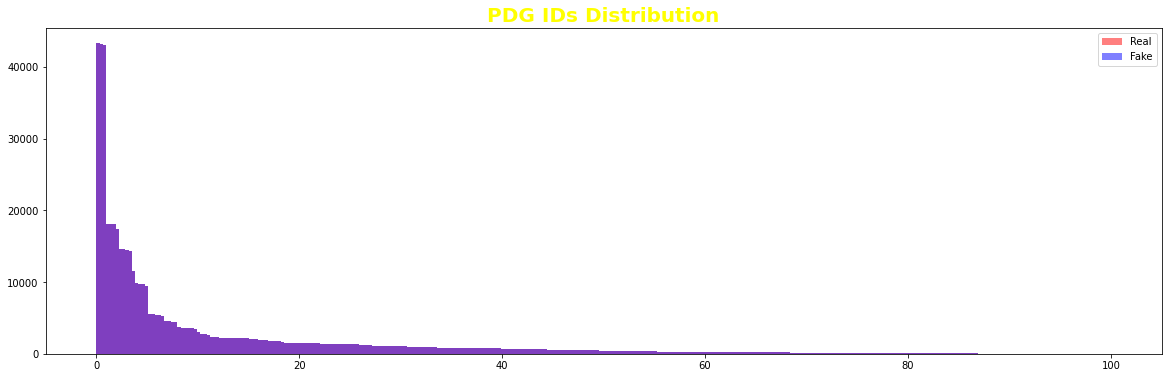

In [ ]:
x_real, y_real = generate_real_samples(275000)
#x_fake, y_fake = generate_fake_samples(generator, latent_dim, 100)
display(x_real,x_real)

In [32]:
# Following Cell Block prints the accuracy of Discriminator model for 100 samples
# It also plots the Squared PDG IDs Distribution for both real and fake samples

In [33]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
  # prepare real samples
  x_real, y_real = generate_real_samples(n)
  # evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  # evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print(epoch, acc_real, acc_fake)
  display(x_real,x_fake)
  

In [34]:
# Rest of the GAN Model is almost same as Vanilla model
# Only modifications are :
# Increasesd the number of layers in both Discriminator & Generator model definition in proportion to number of inputs/number of outputs ( sample size )
# for sample size=2 , 2/2=1 , thus all layers increased 1 time
# increased the size of Latent Points Generated by factor of 1
# latent_dim =5 
# n_epochs = 10000 , n_batch = 128 , n_eval = 100

In [35]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# X = X.astype(np.int)
	# create class labels
	y = zeros((n, 1))
	return X, y


In [36]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=100):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


99 0.9100000262260437 0.6200000047683716


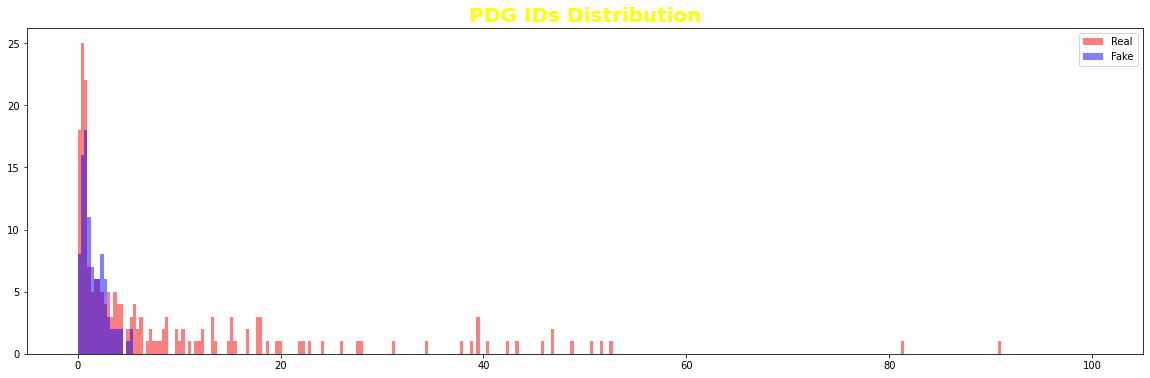

199 0.9300000071525574 0.949999988079071


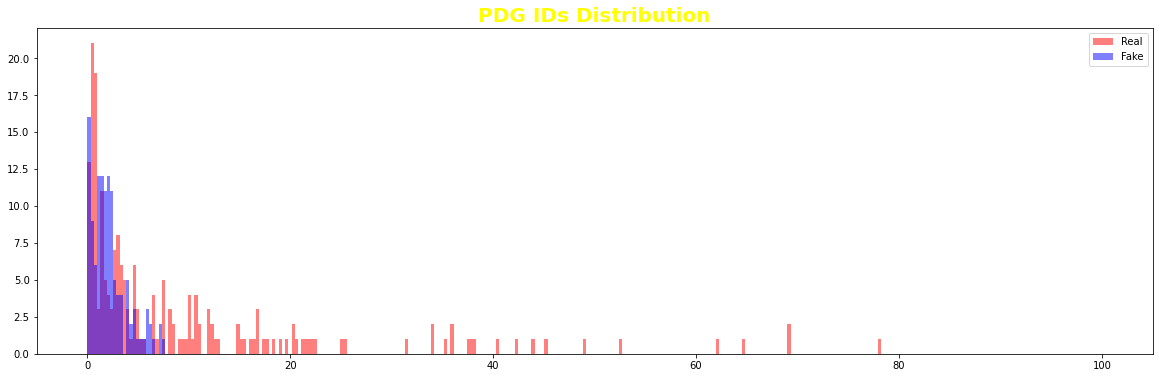

299 0.8100000023841858 0.4099999964237213


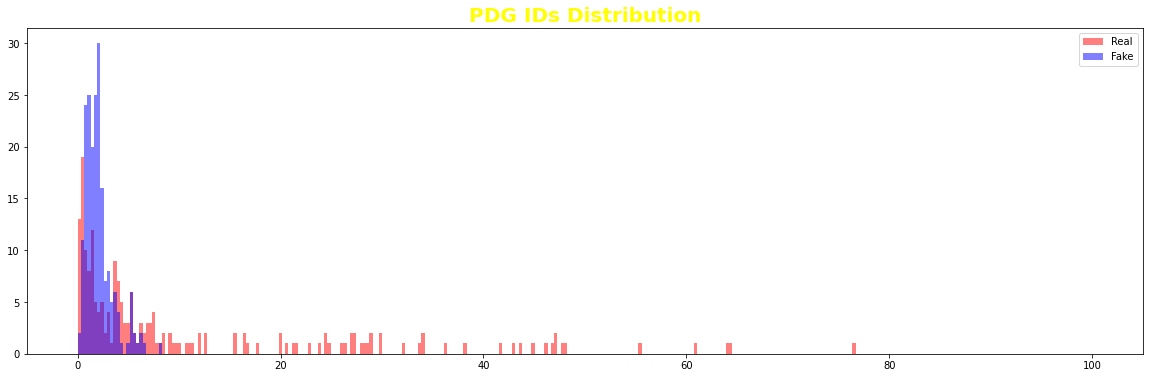

399 0.6800000071525574 0.9200000166893005


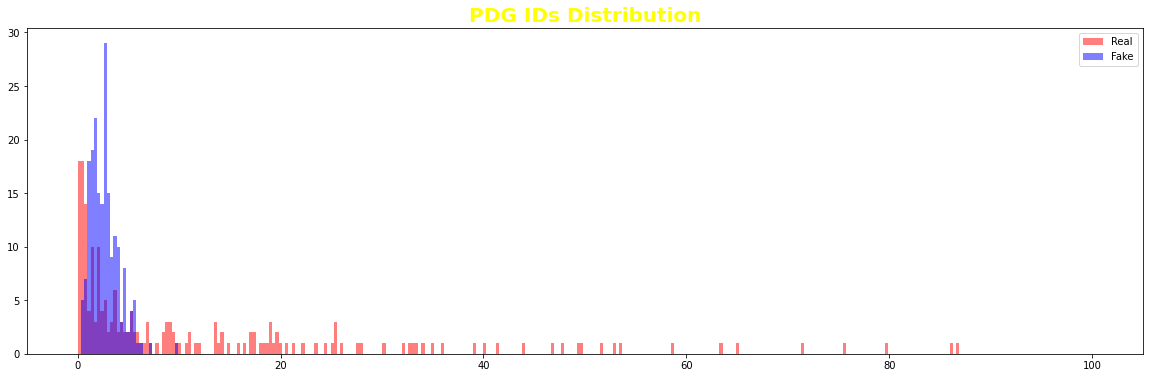

499 0.6200000047683716 0.8600000143051147


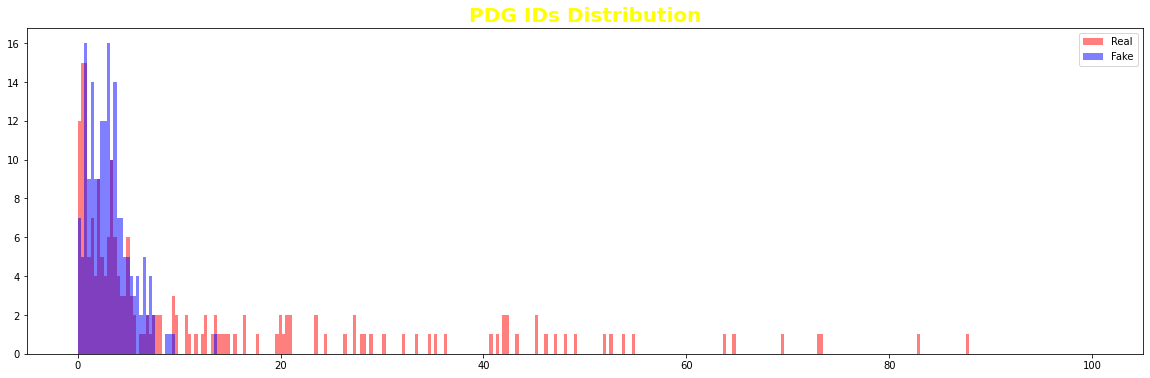

599 0.5099999904632568 0.7599999904632568


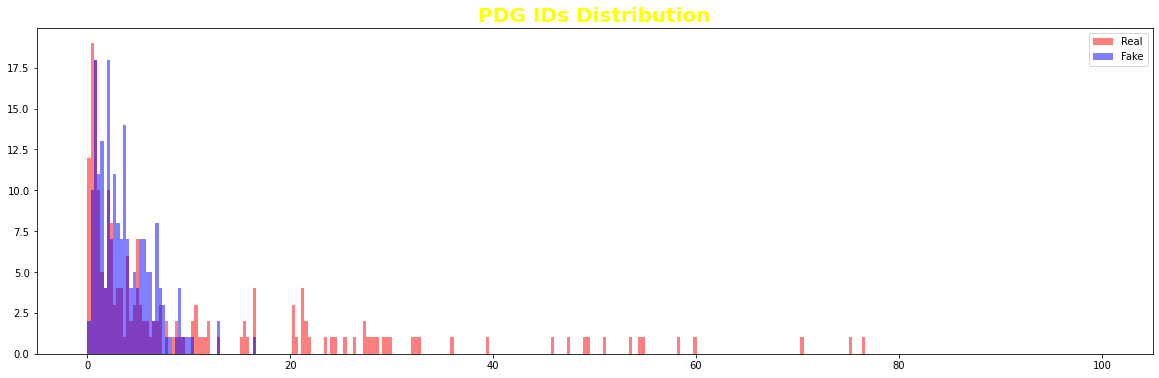

699 0.550000011920929 0.7900000214576721


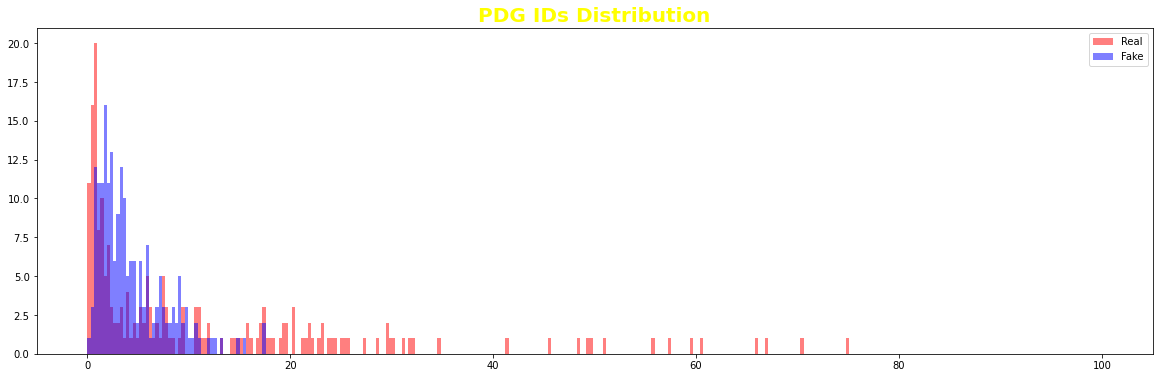

799 0.4300000071525574 0.8600000143051147


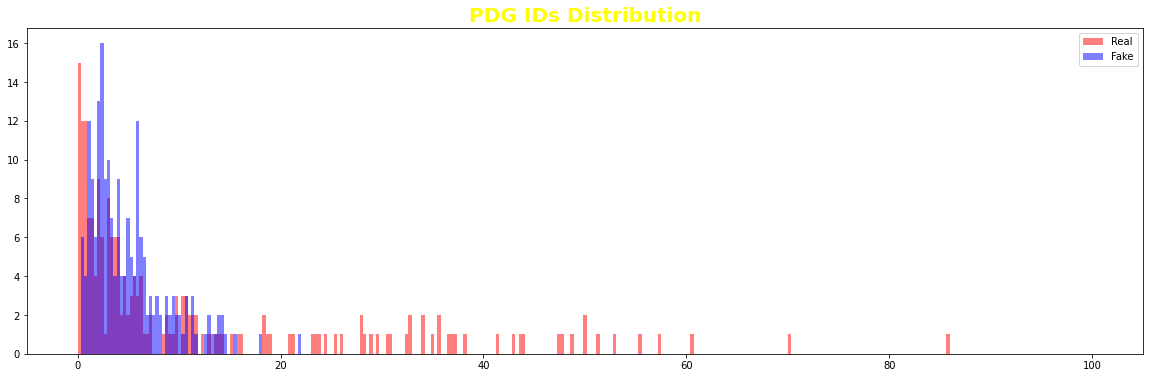

899 0.41999998688697815 0.7799999713897705


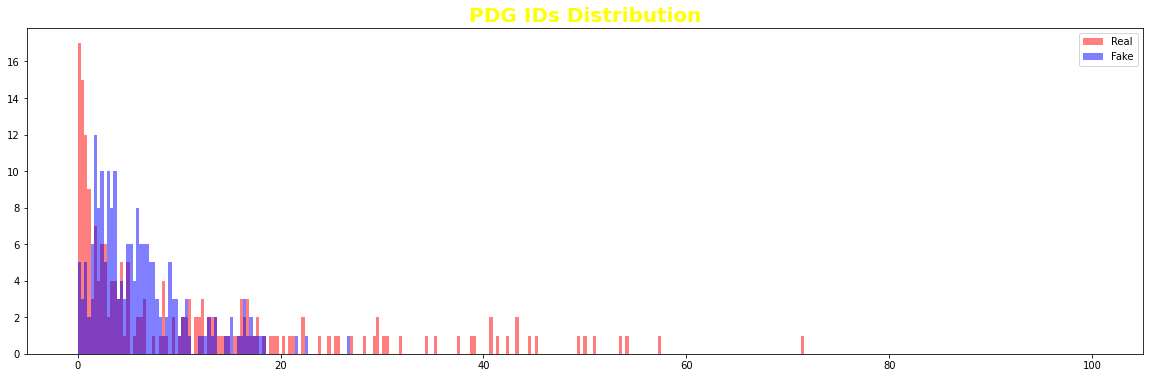

999 0.44999998807907104 0.8399999737739563


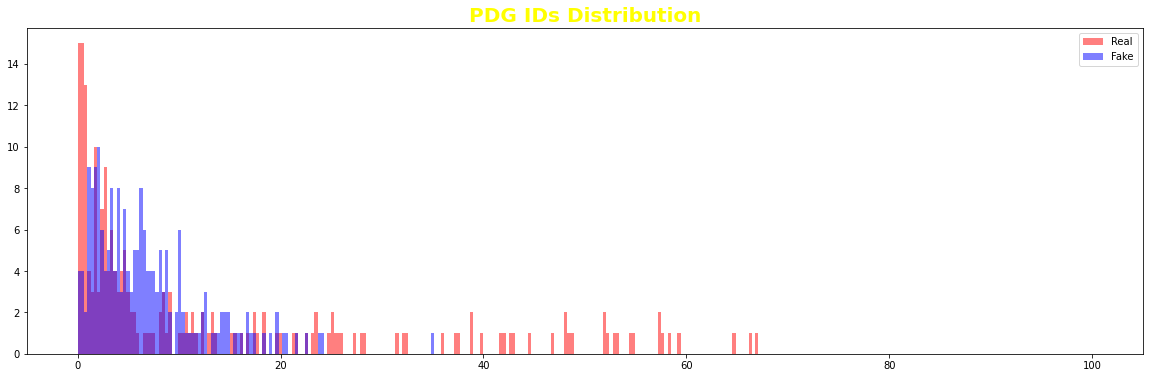

1099 0.3199999928474426 0.8100000023841858


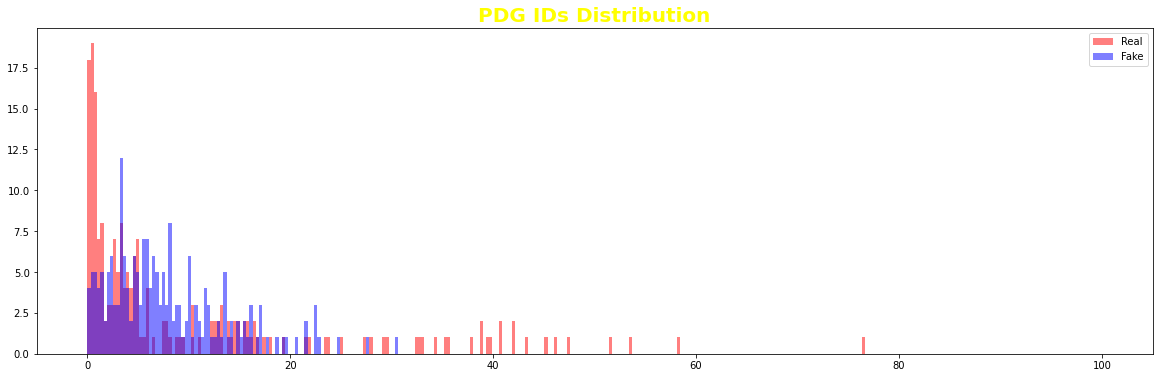

1199 0.28999999165534973 0.8299999833106995


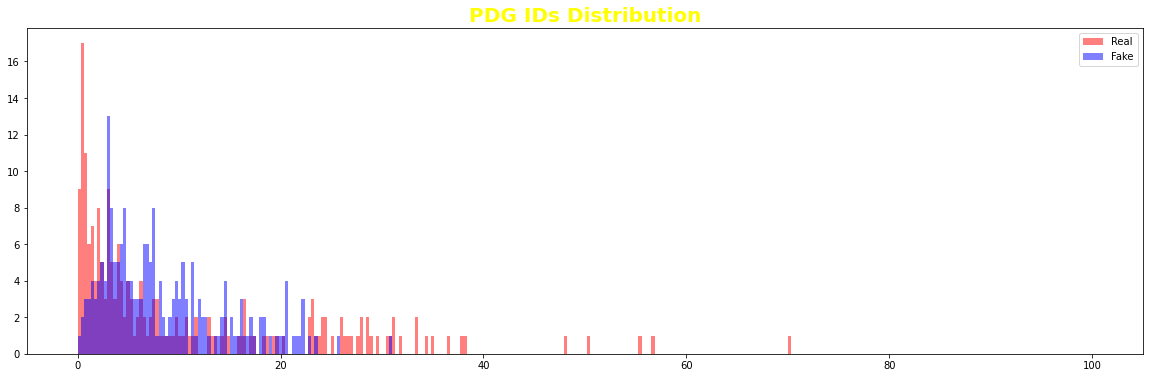

1299 0.3199999928474426 0.8500000238418579


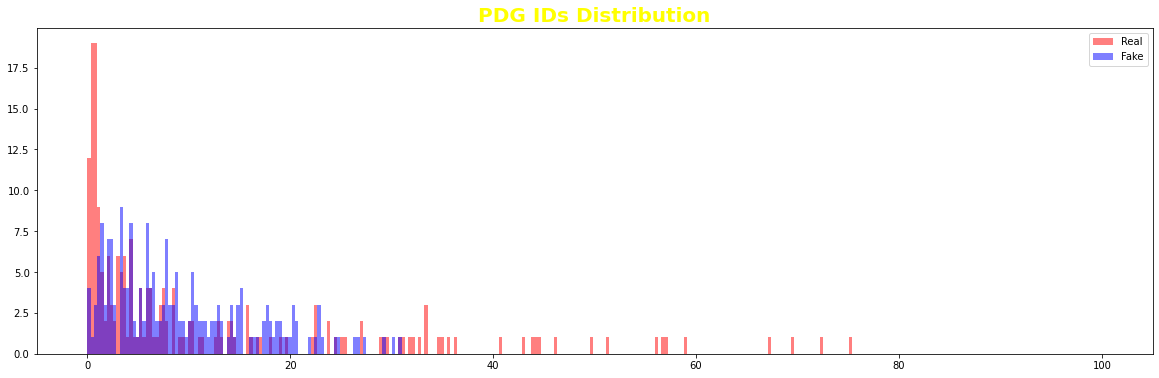

1399 0.2199999988079071 0.8299999833106995


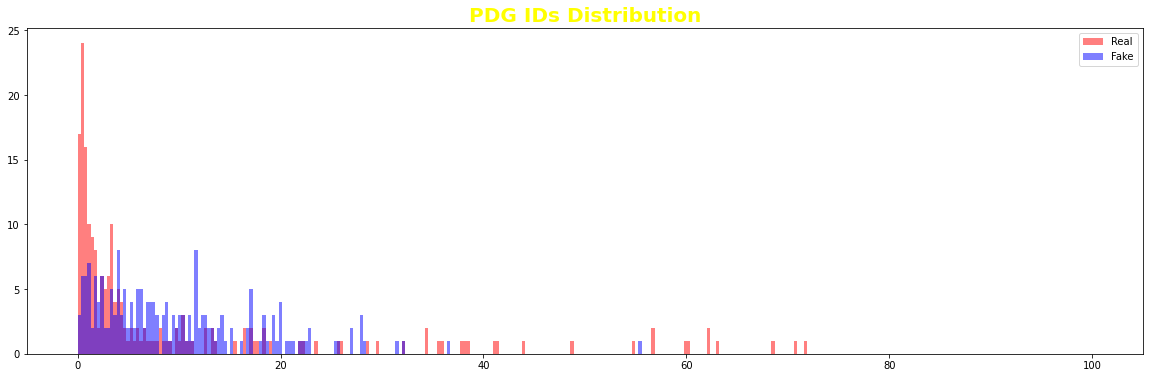

1499 0.17000000178813934 0.9300000071525574


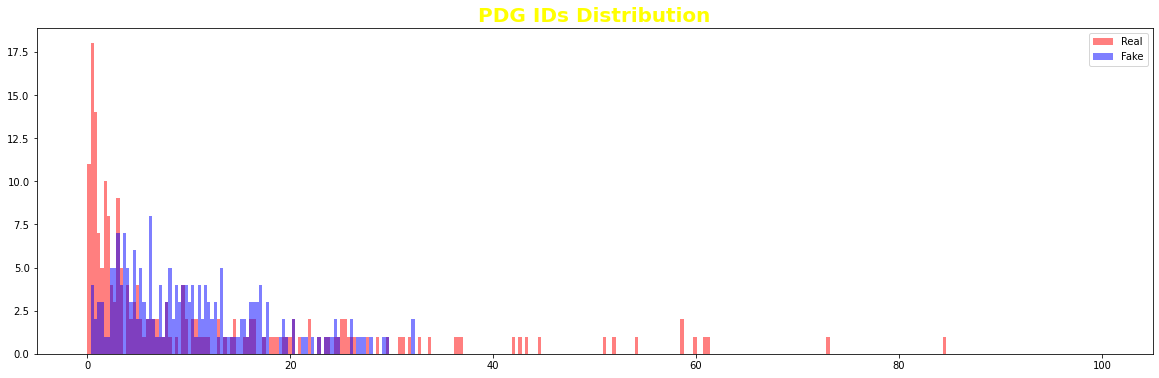

1599 0.27000001072883606 0.8899999856948853


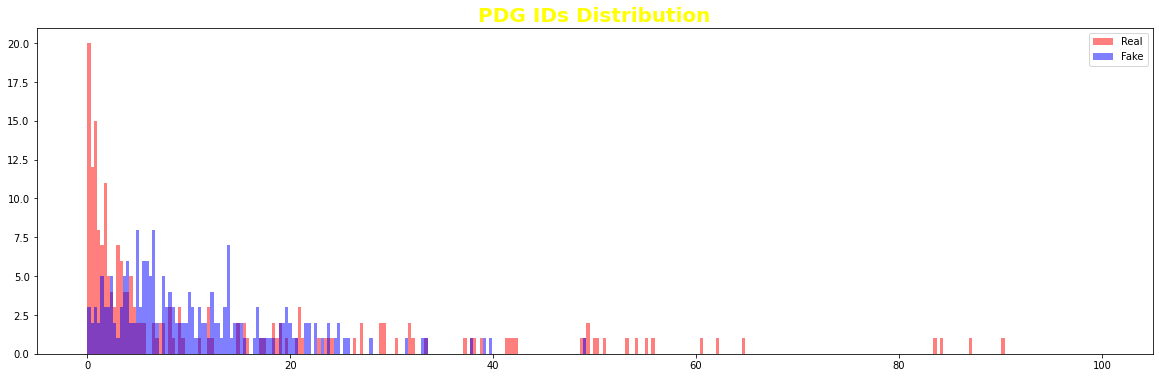

1699 0.11999999731779099 0.8799999952316284


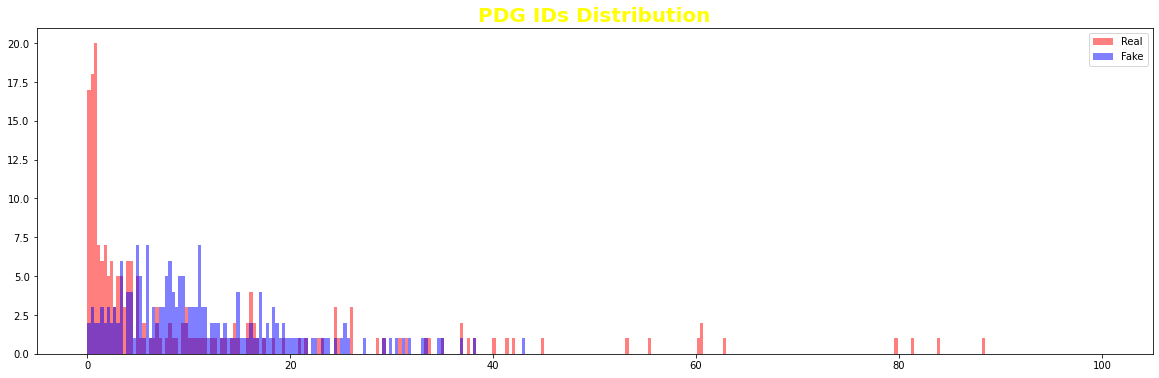

1799 0.11999999731779099 0.8899999856948853


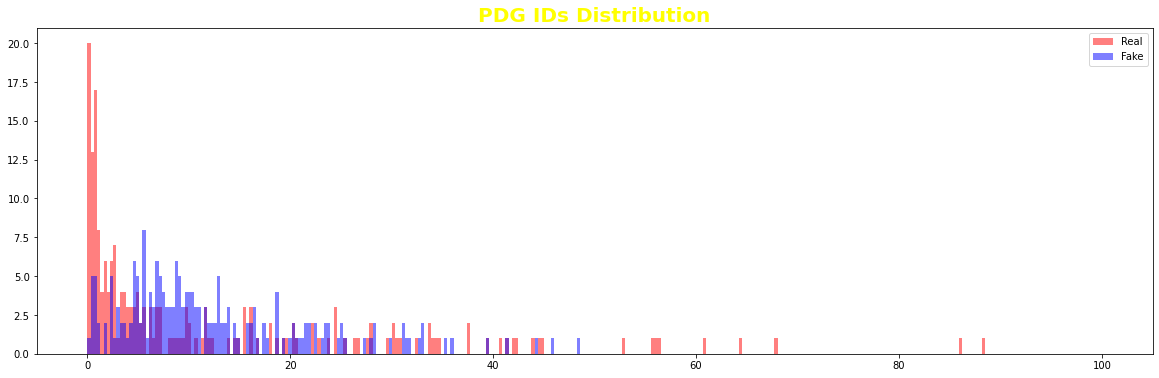

1899 0.05999999865889549 0.9399999976158142


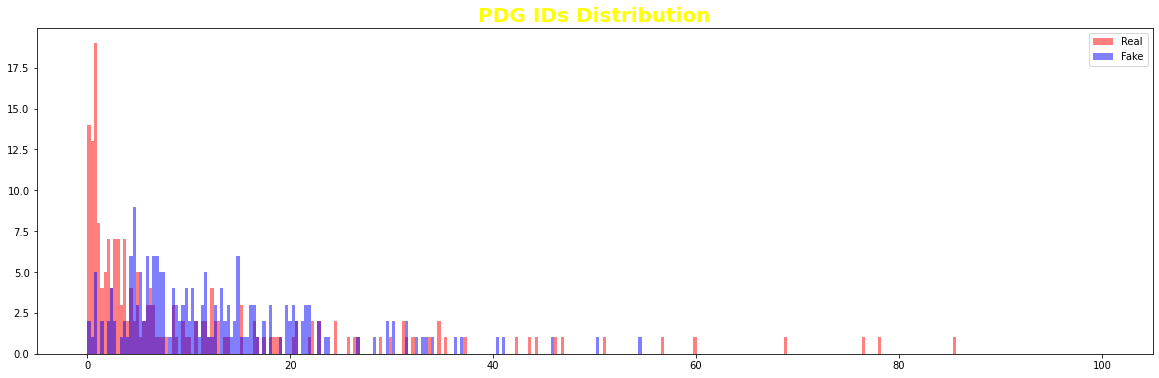

1999 0.05999999865889549 0.9800000190734863


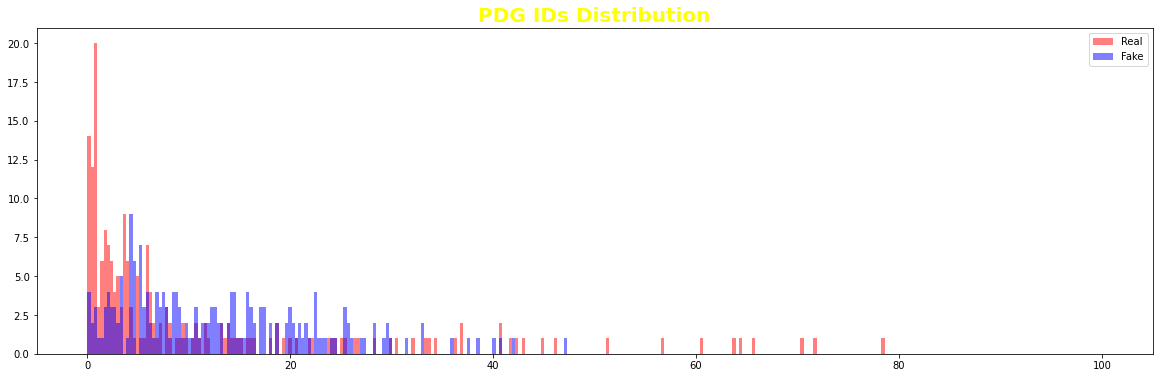

2099 0.019999999552965164 0.8799999952316284


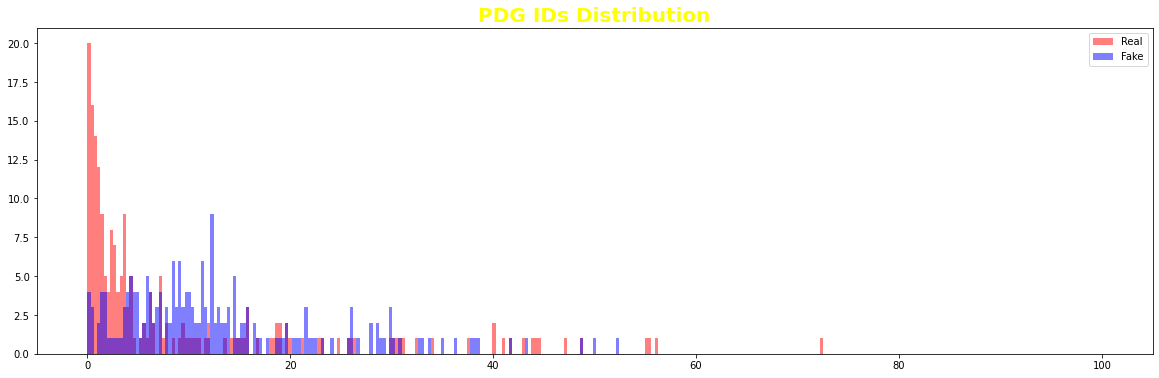

2199 0.10999999940395355 0.9100000262260437


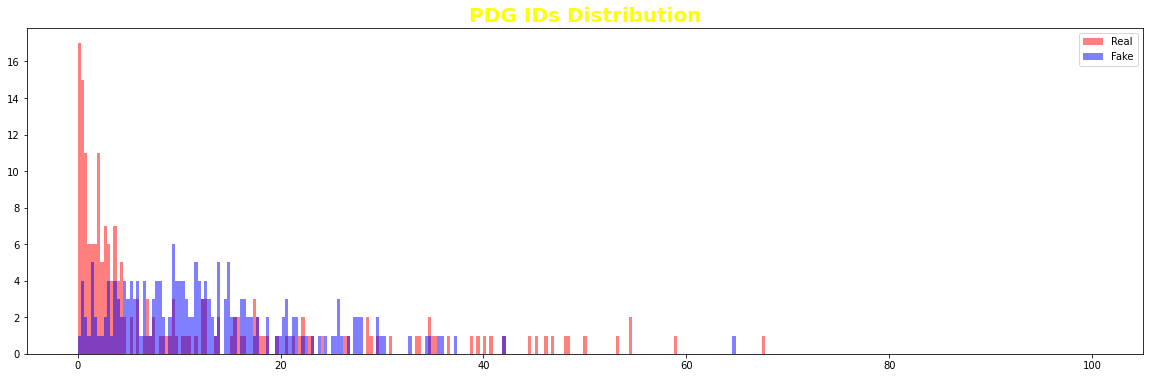

2299 0.09000000357627869 0.8999999761581421


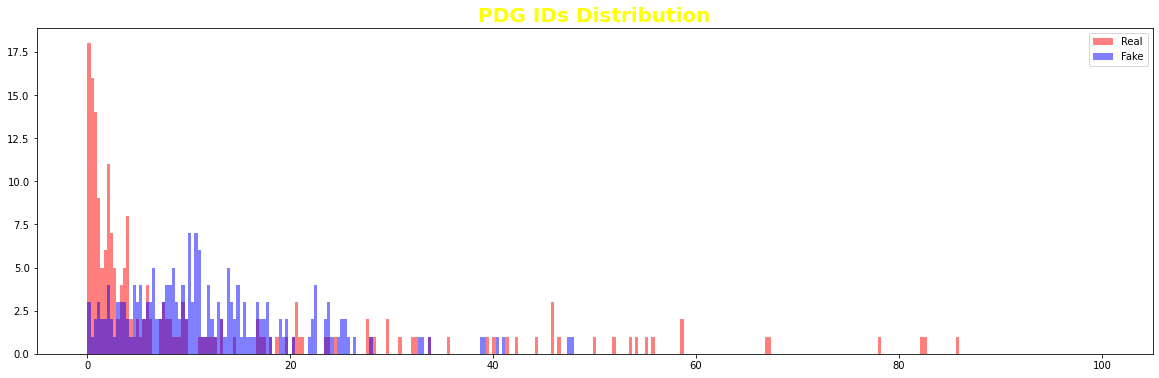

2399 0.14000000059604645 0.949999988079071


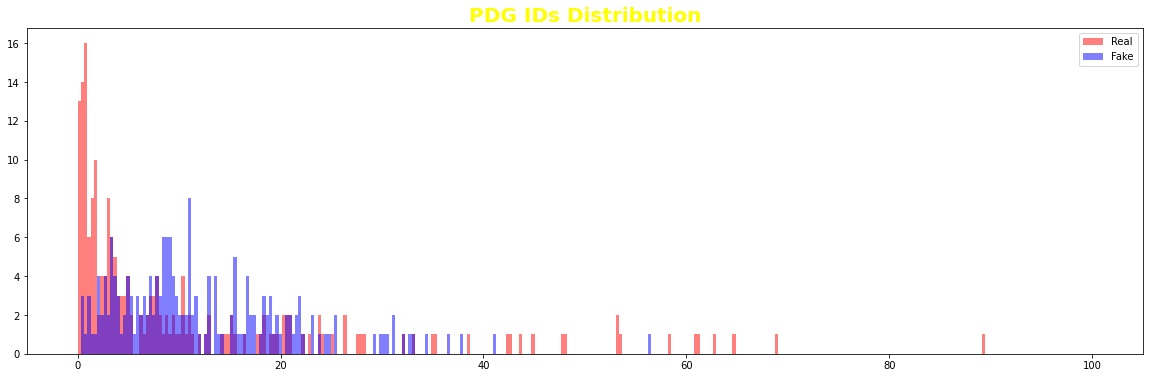

2499 0.3799999952316284 0.7699999809265137


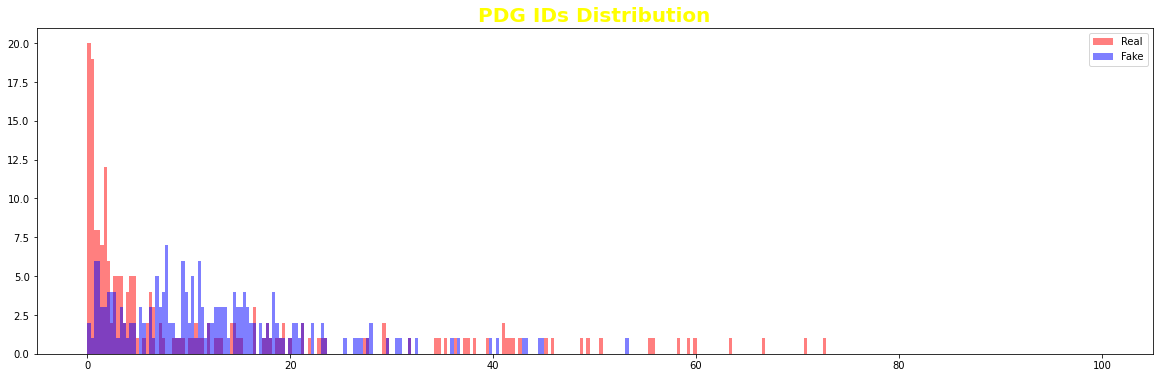

2599 0.41999998688697815 0.8299999833106995


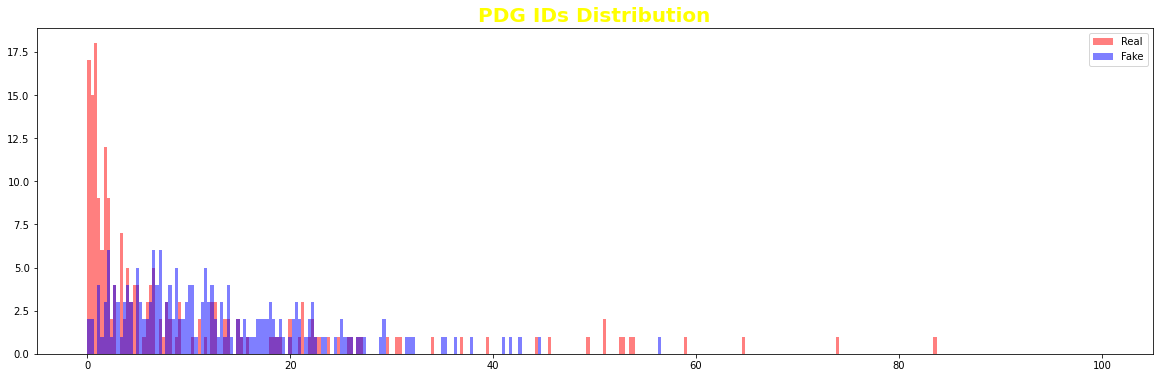

2699 0.5 0.6600000262260437


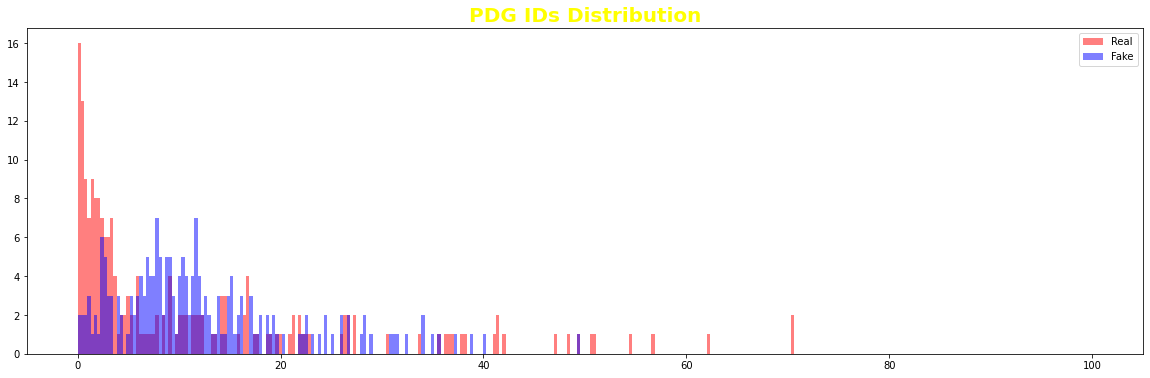

2799 0.4699999988079071 0.6100000143051147


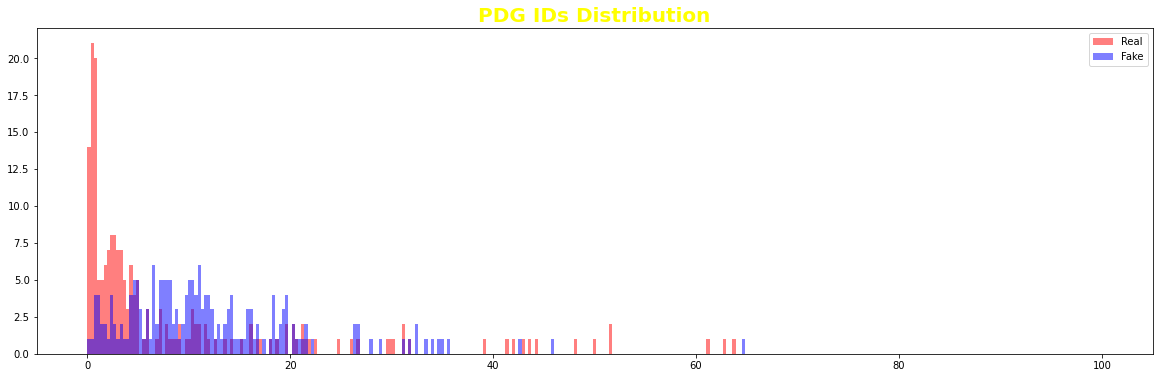

2899 0.6700000166893005 0.5099999904632568


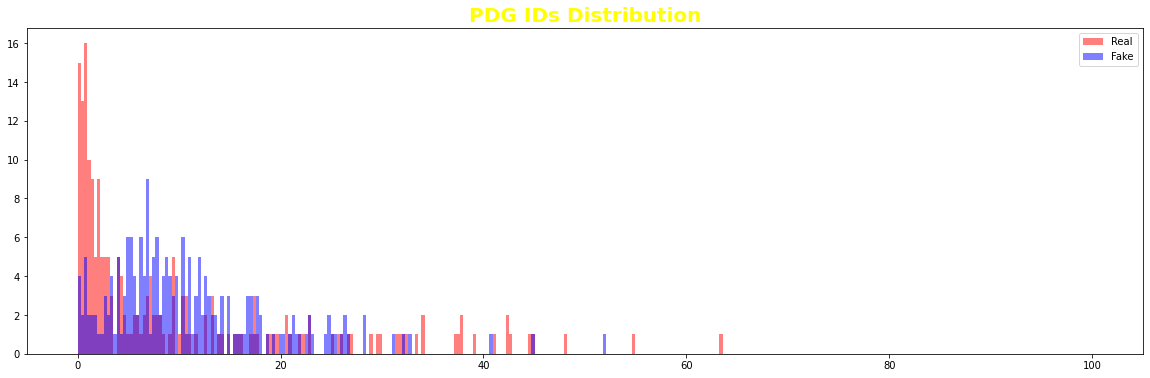

2999 0.550000011920929 0.49000000953674316


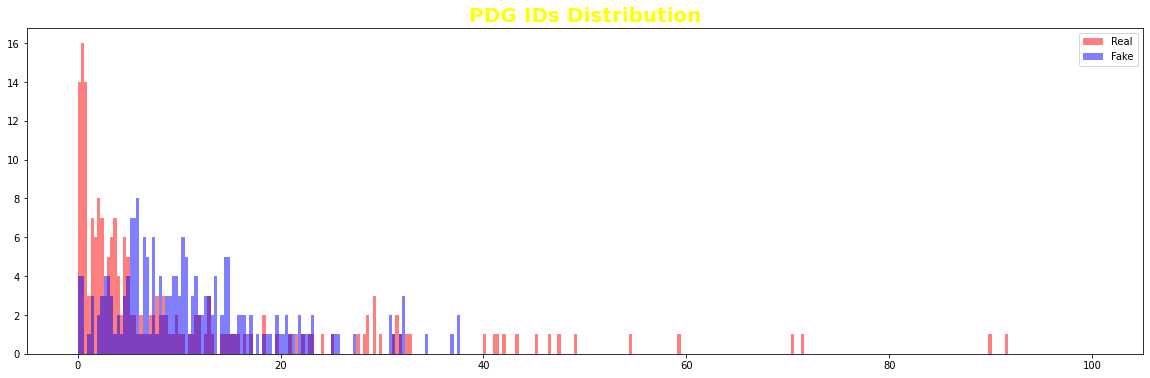

3099 0.5600000023841858 0.5099999904632568


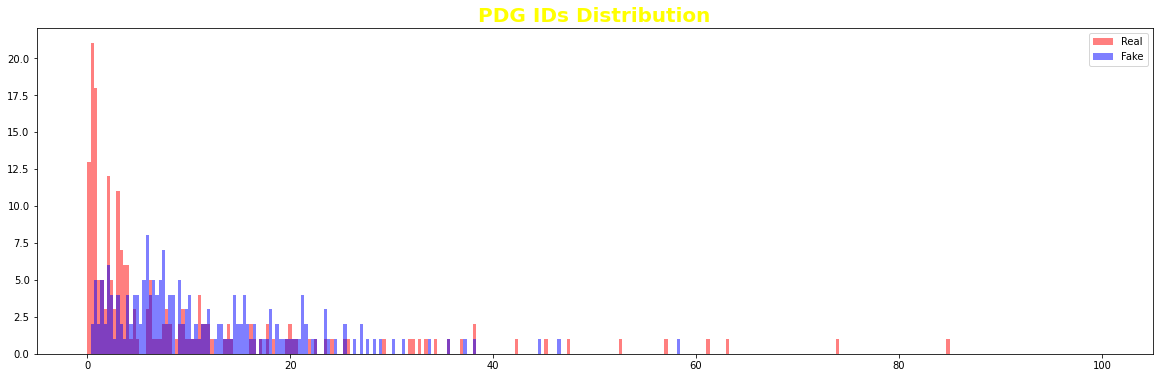

3199 0.550000011920929 0.6100000143051147


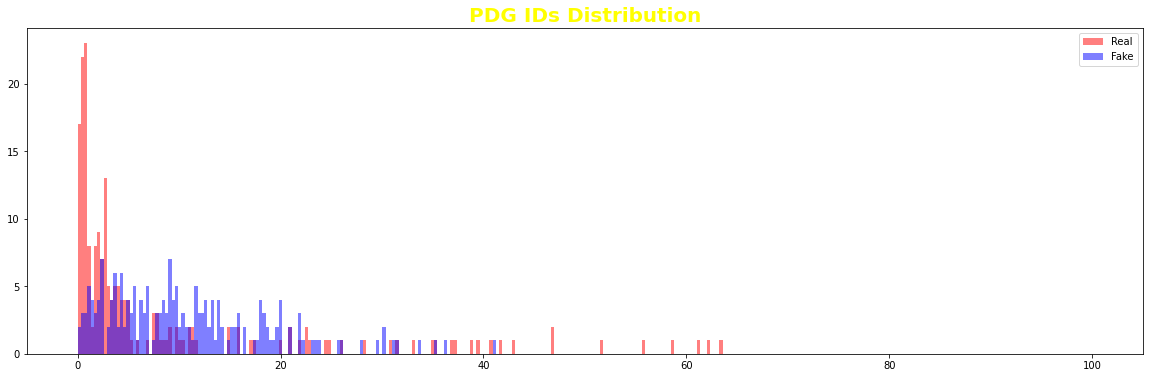

3299 0.6299999952316284 0.4000000059604645


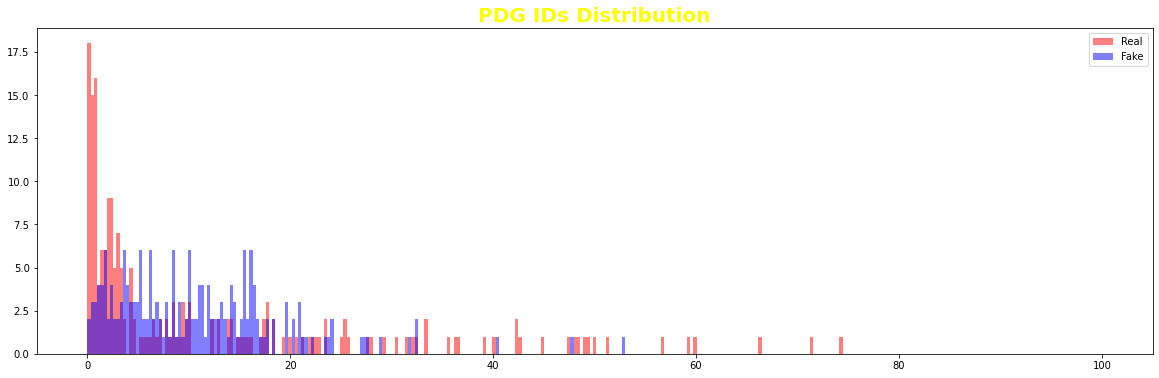

3399 0.47999998927116394 0.5699999928474426


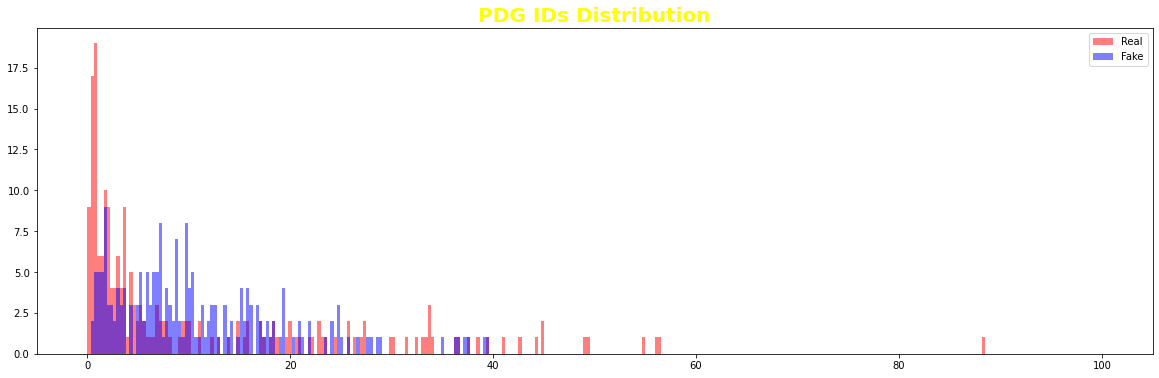

3499 0.44999998807907104 0.4699999988079071


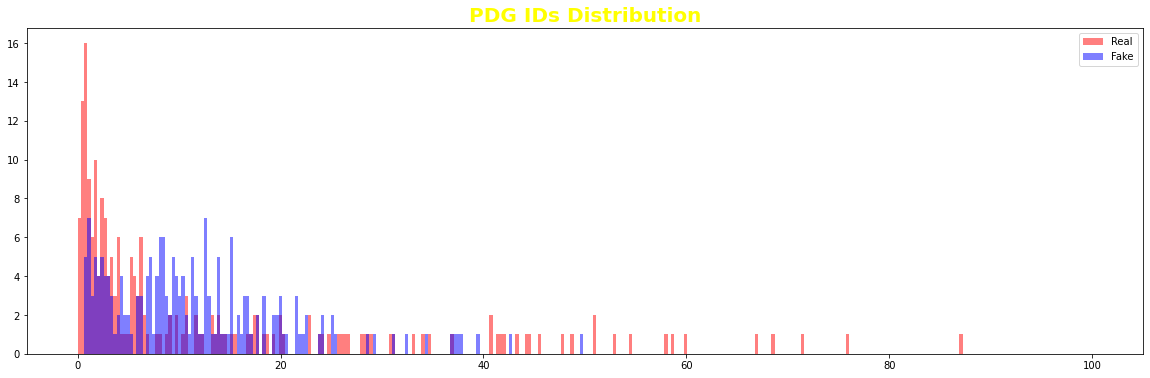

3599 0.6600000262260437 0.4300000071525574


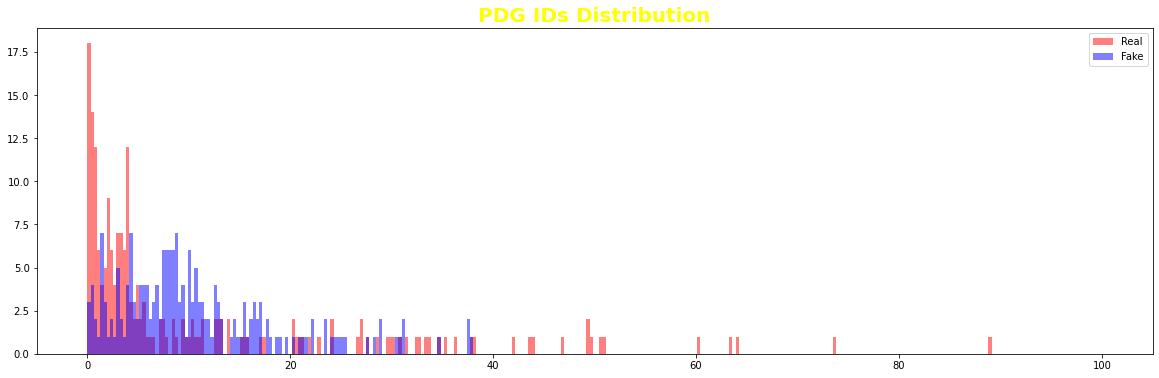

3699 0.6200000047683716 0.46000000834465027


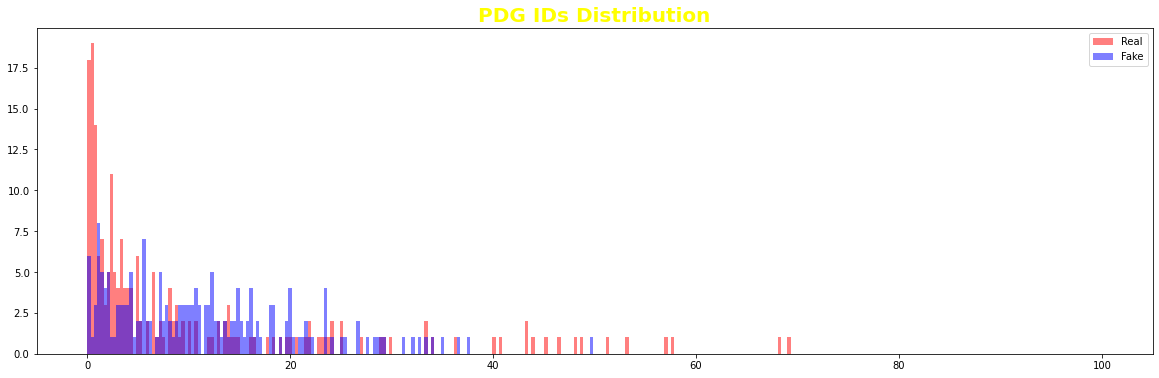

3799 0.6499999761581421 0.5400000214576721


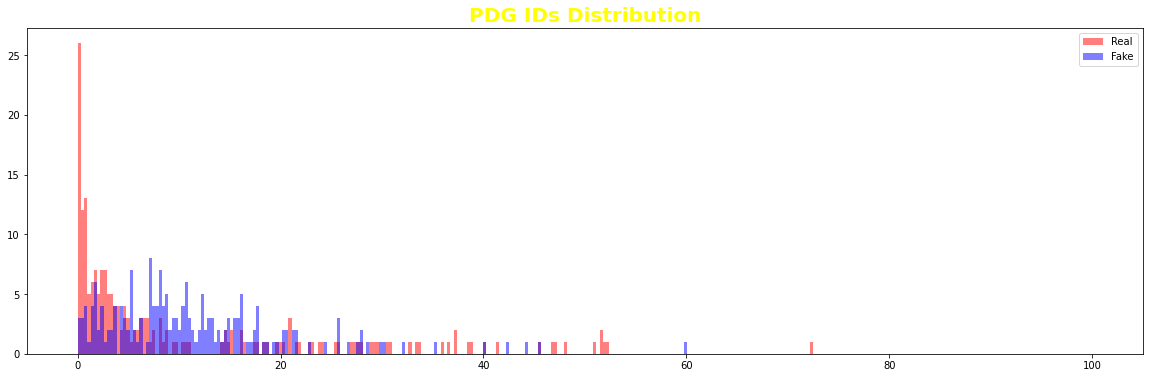

3899 0.5899999737739563 0.5600000023841858


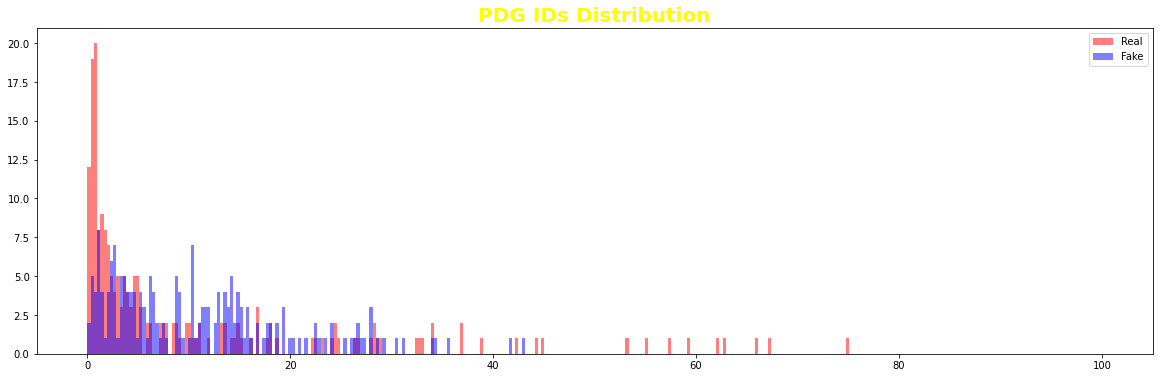

3999 0.5899999737739563 0.38999998569488525


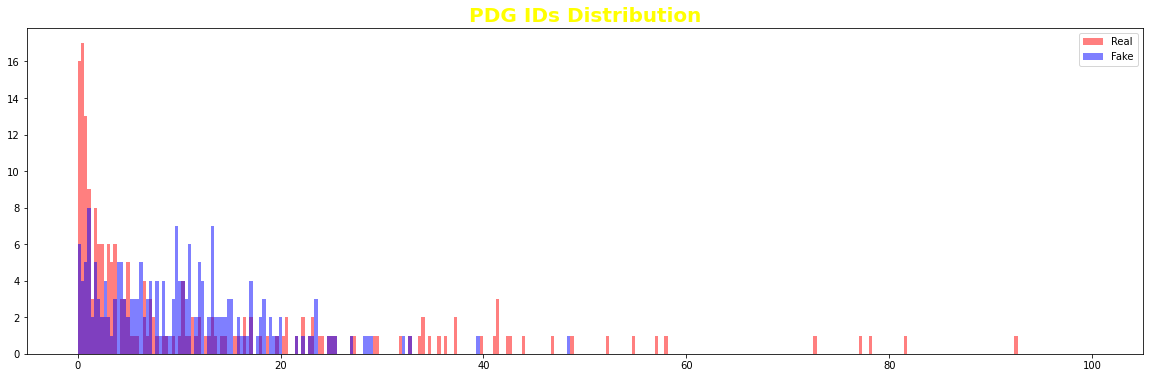

4099 0.6200000047683716 0.4399999976158142


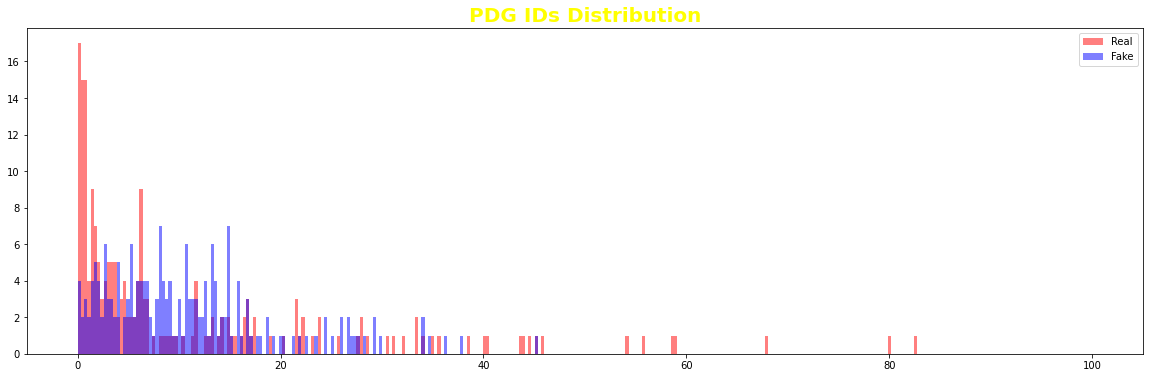

4199 0.5199999809265137 0.46000000834465027


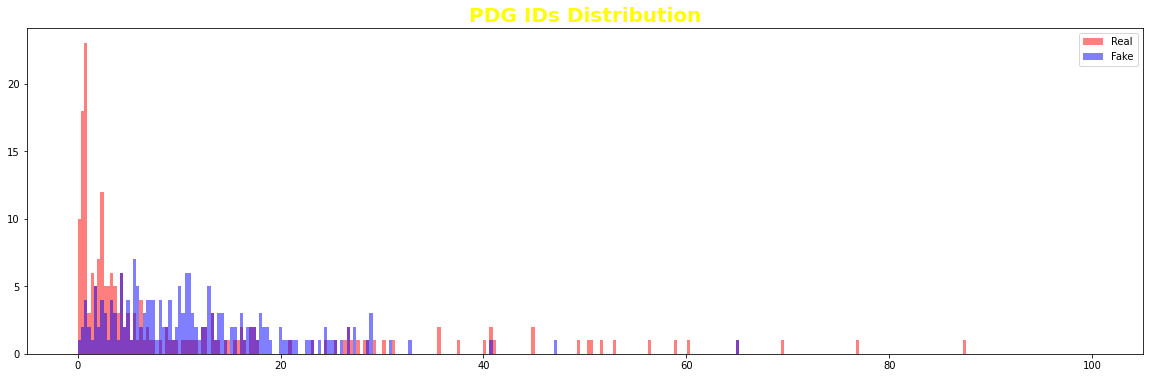

4299 0.6000000238418579 0.49000000953674316


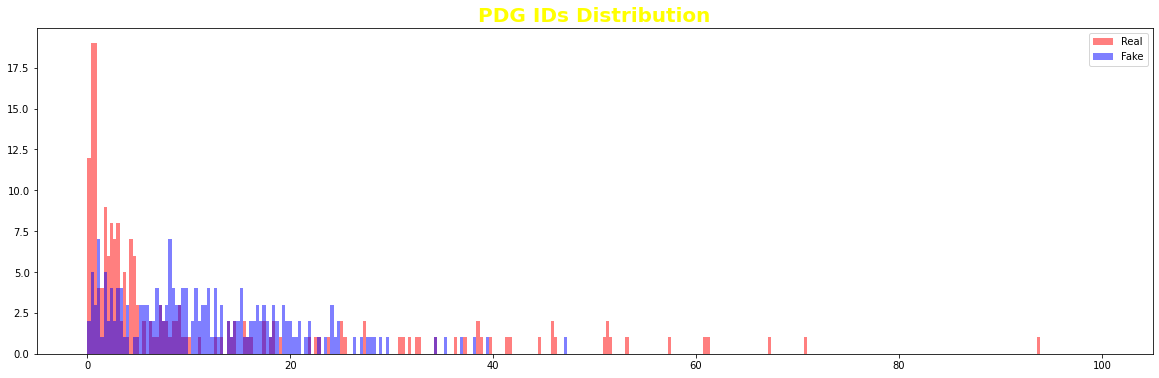

4399 0.5699999928474426 0.5099999904632568


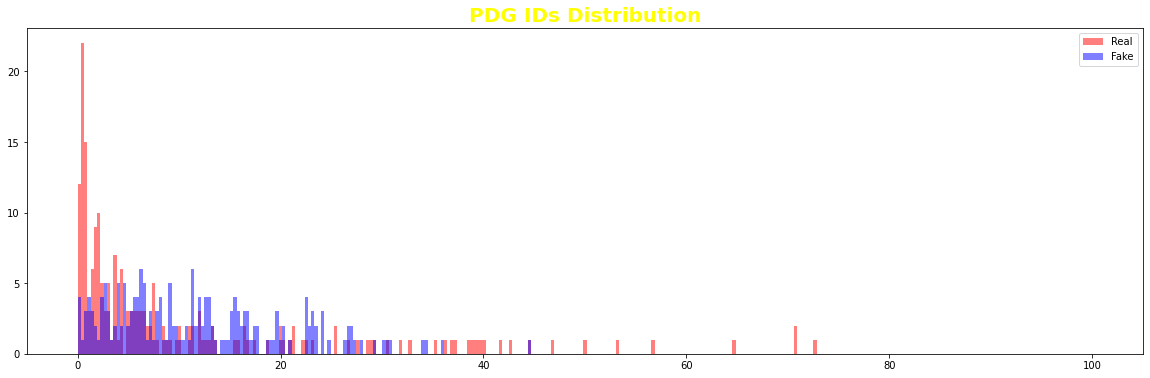

4499 0.6200000047683716 0.6200000047683716


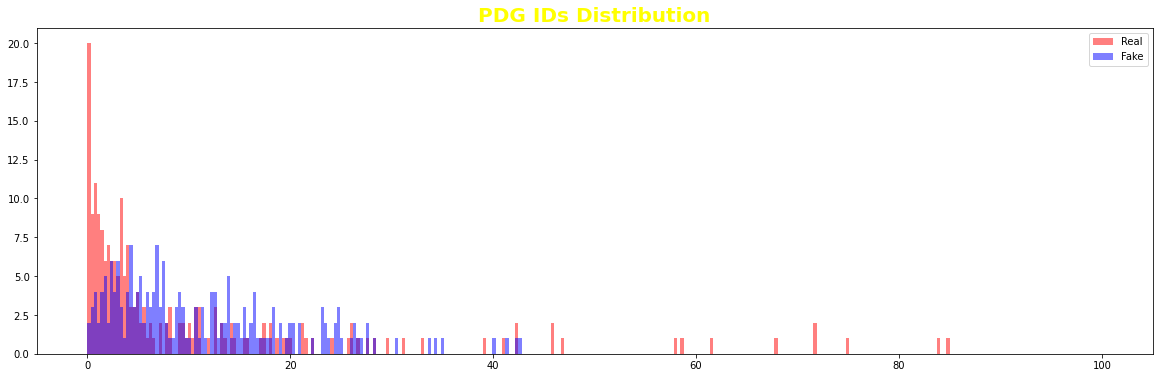

4599 0.5299999713897705 0.5899999737739563


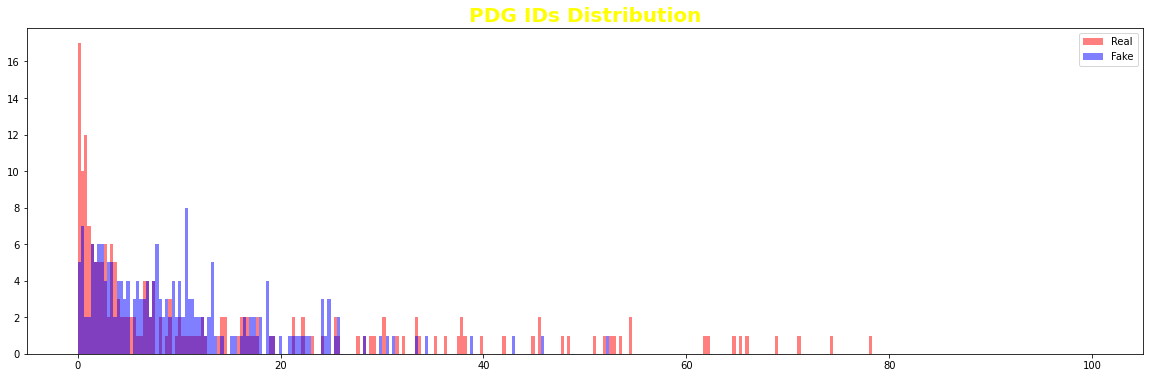

4699 0.550000011920929 0.5799999833106995


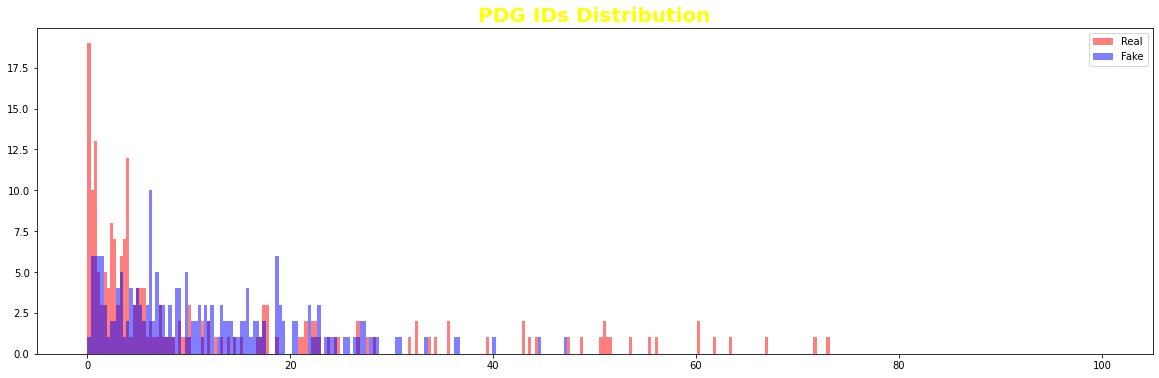

4799 0.6200000047683716 0.5099999904632568


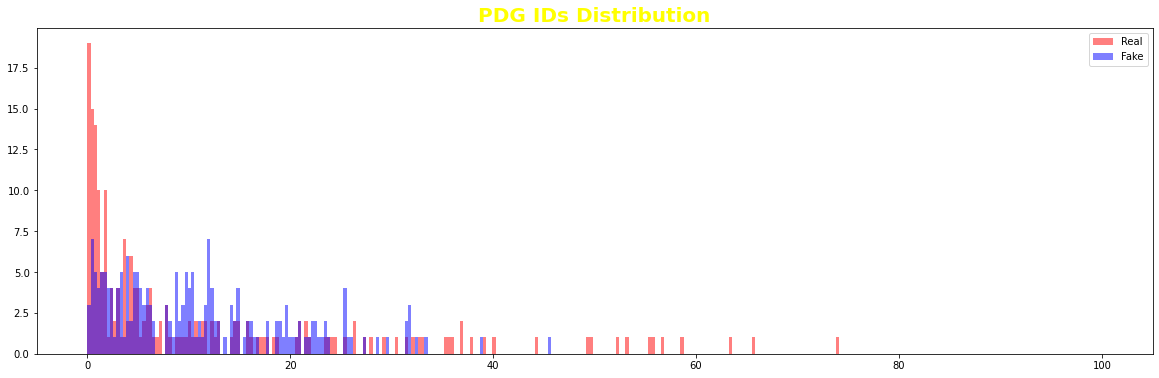

4899 0.6100000143051147 0.4699999988079071


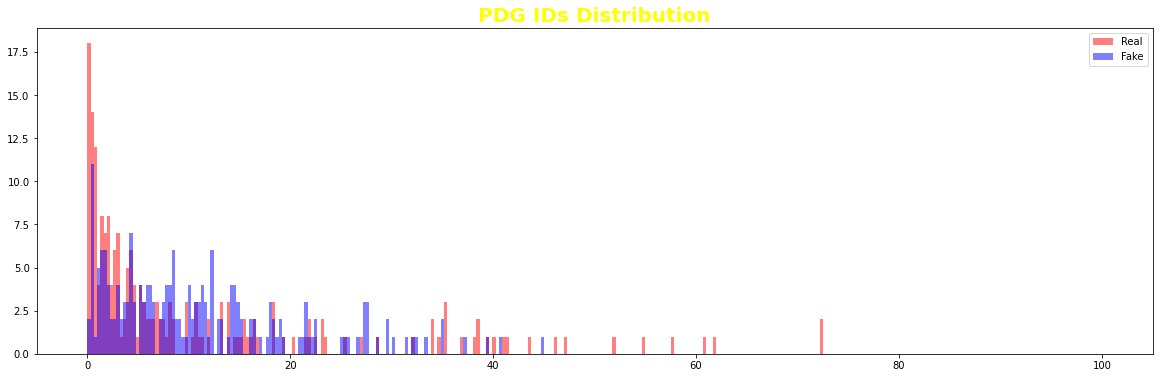

4999 0.6600000262260437 0.41999998688697815


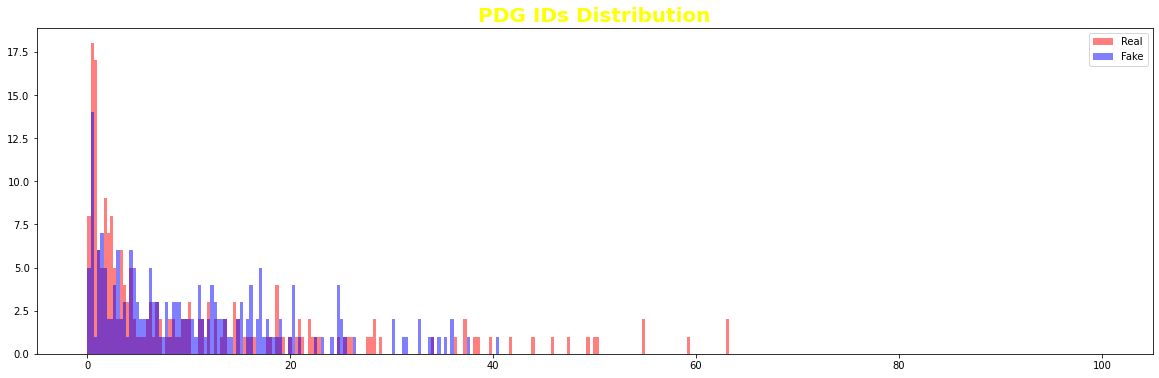

5099 0.6000000238418579 0.36000001430511475


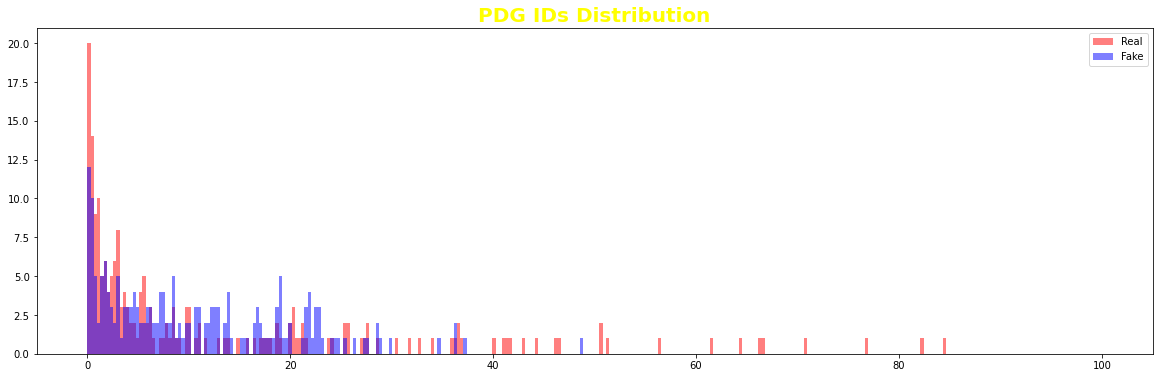

5199 0.5899999737739563 0.4399999976158142


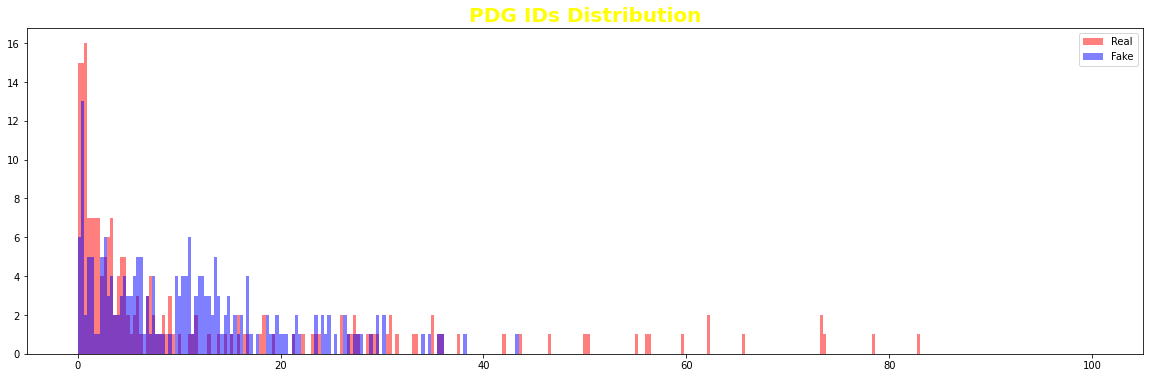

5299 0.5799999833106995 0.5199999809265137


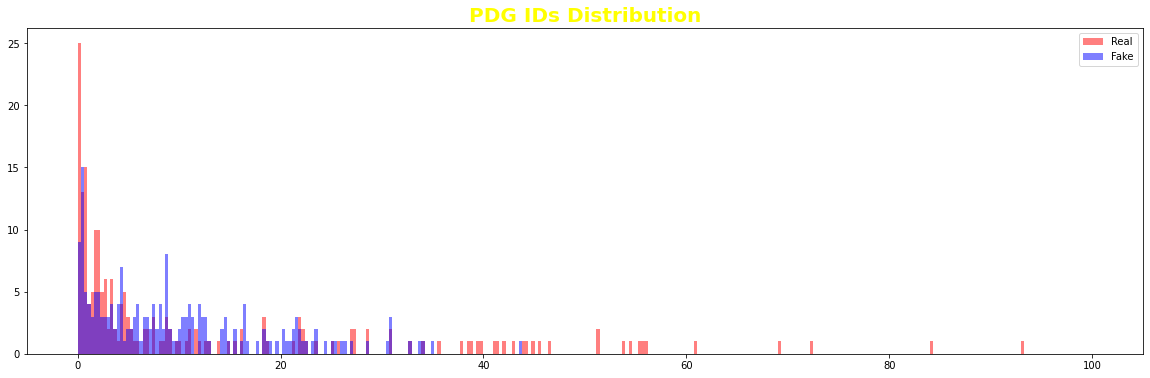

5399 0.6299999952316284 0.3799999952316284


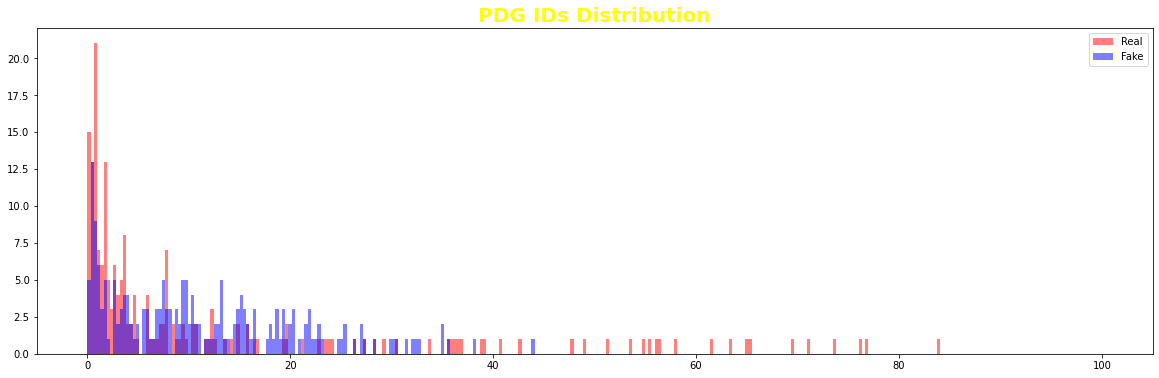

5499 0.5099999904632568 0.3799999952316284


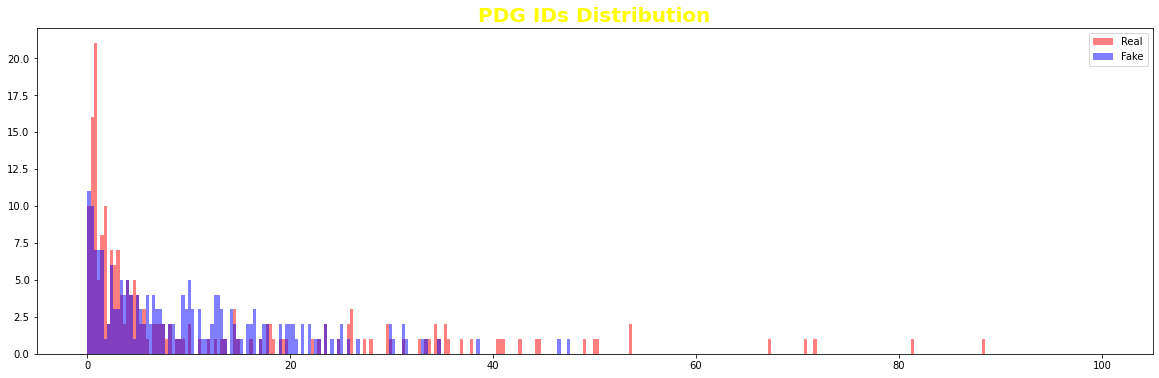

5599 0.47999998927116394 0.41999998688697815


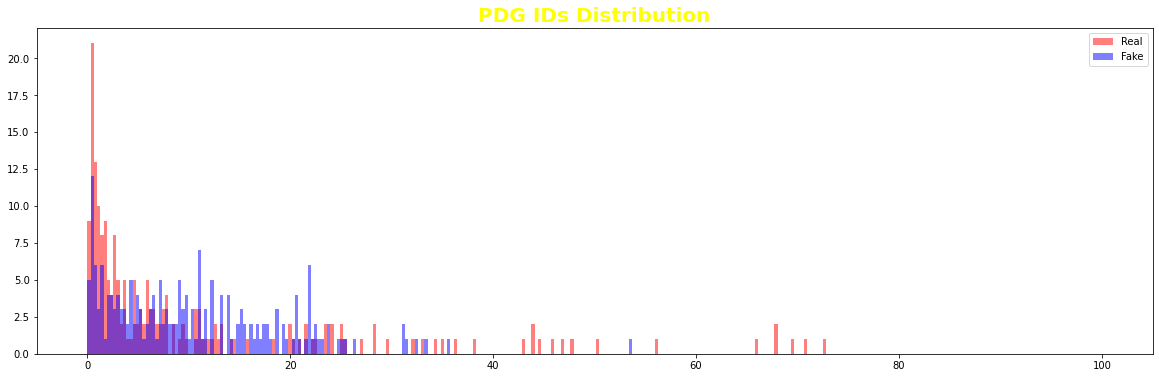

5699 0.550000011920929 0.4300000071525574


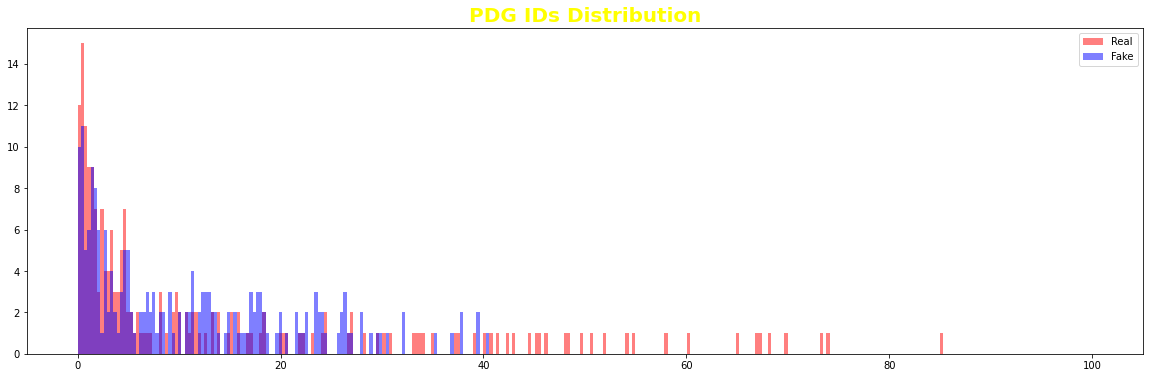

5799 0.5699999928474426 0.3799999952316284


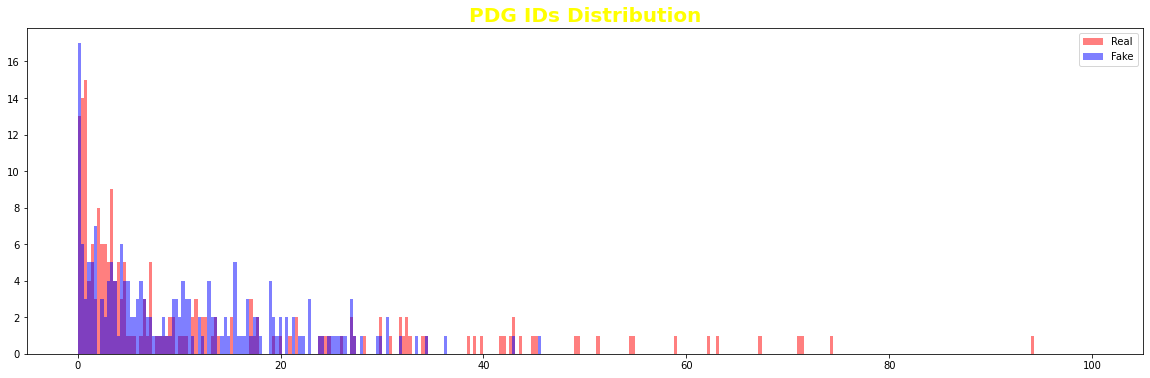

5899 0.5799999833106995 0.5400000214576721


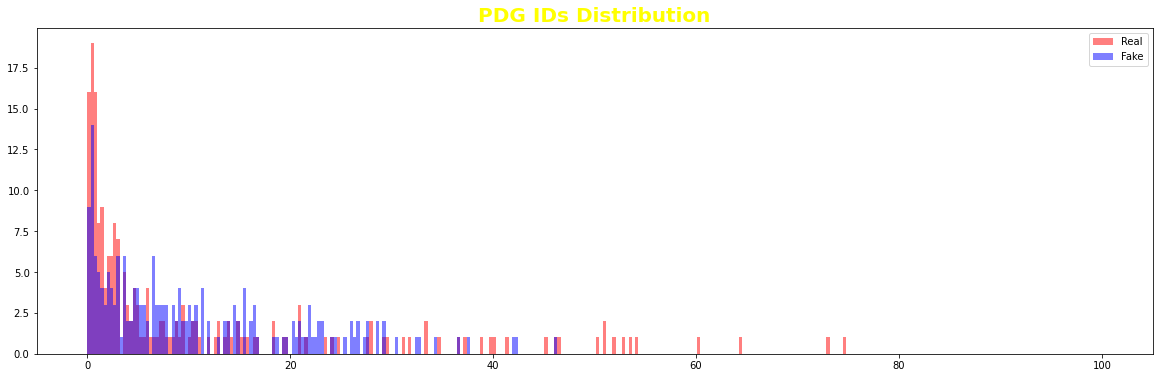

5999 0.6800000071525574 0.27000001072883606


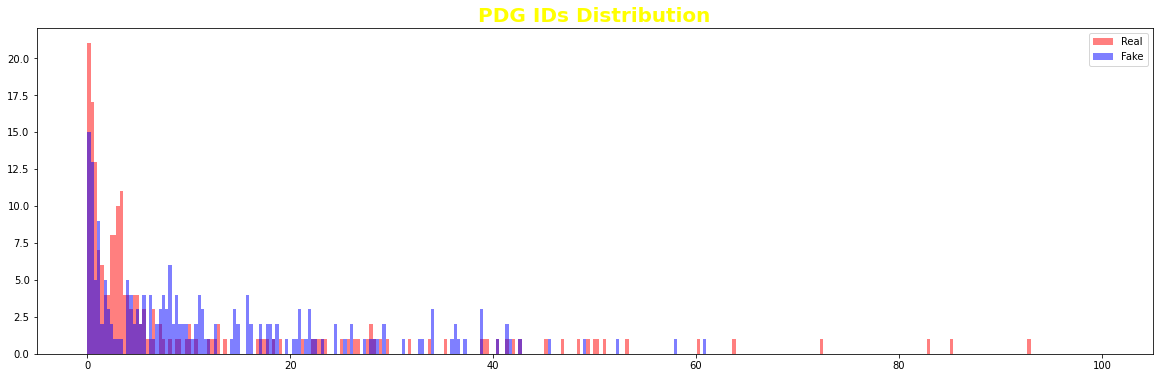

6099 0.3799999952316284 0.4699999988079071


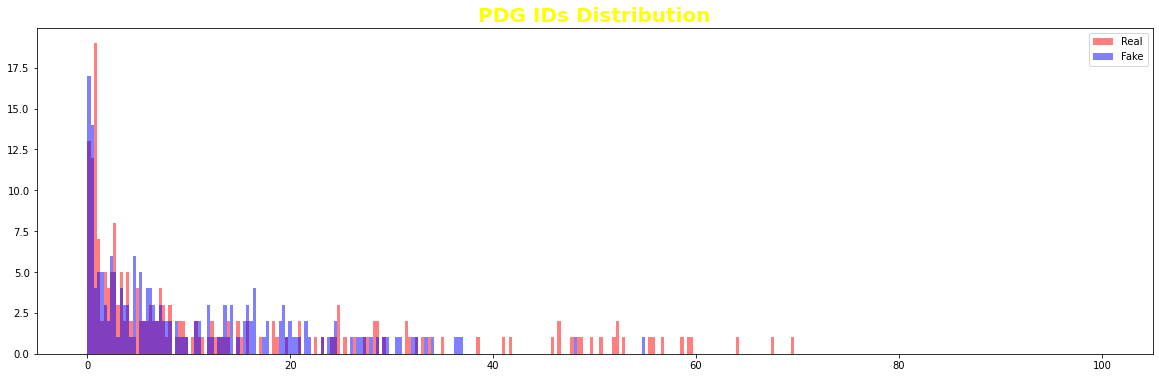

6199 0.6499999761581421 0.3100000023841858


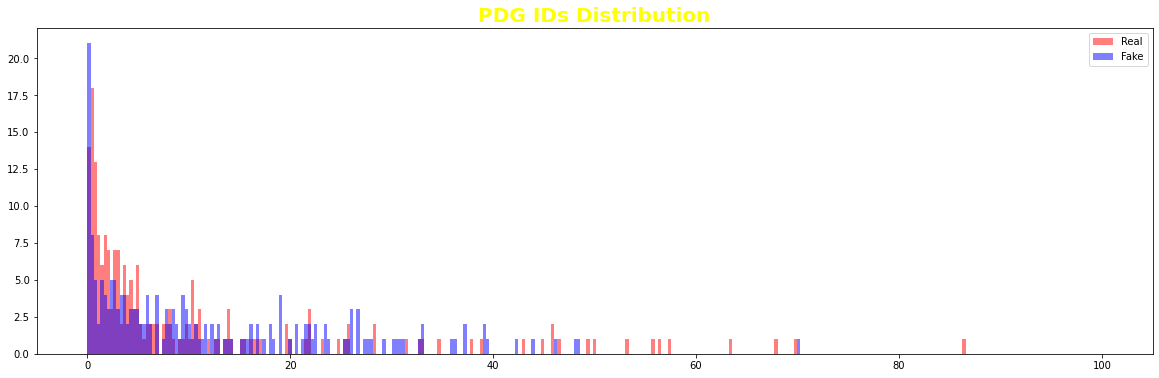

6299 0.4300000071525574 0.6399999856948853


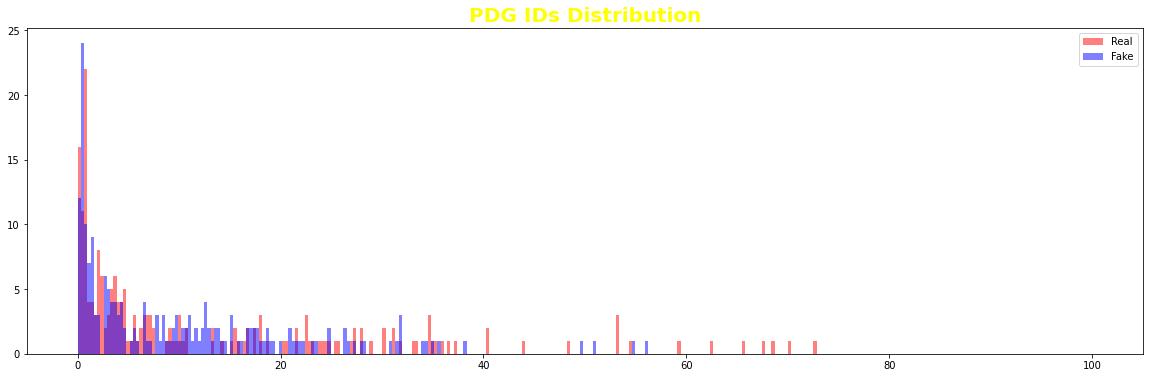

6399 0.4699999988079071 0.25999999046325684


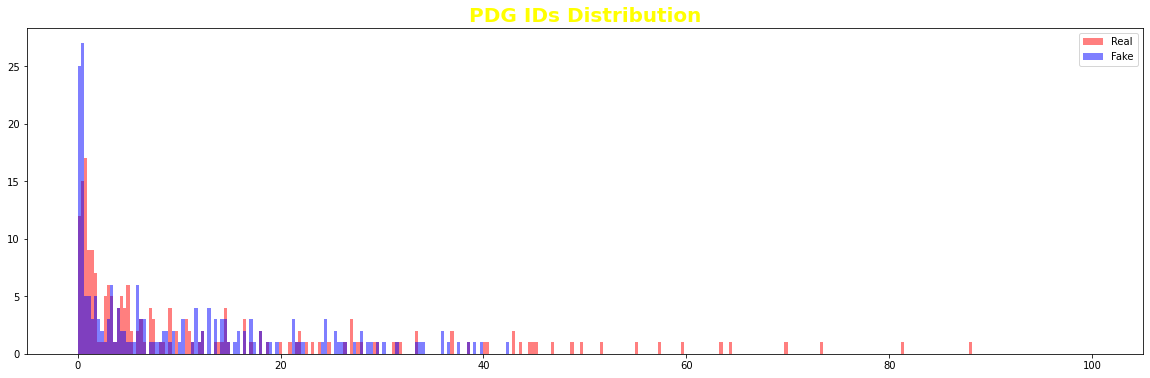

6499 0.3700000047683716 0.5400000214576721


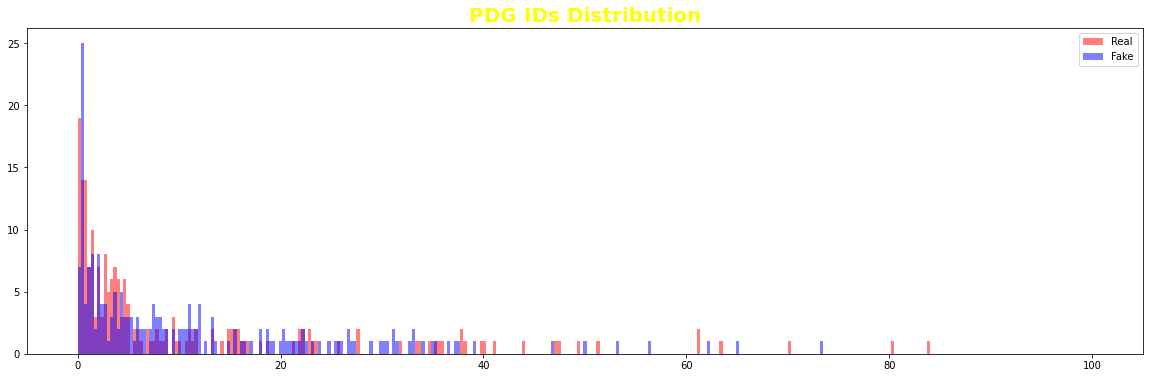

6599 0.5600000023841858 0.28999999165534973


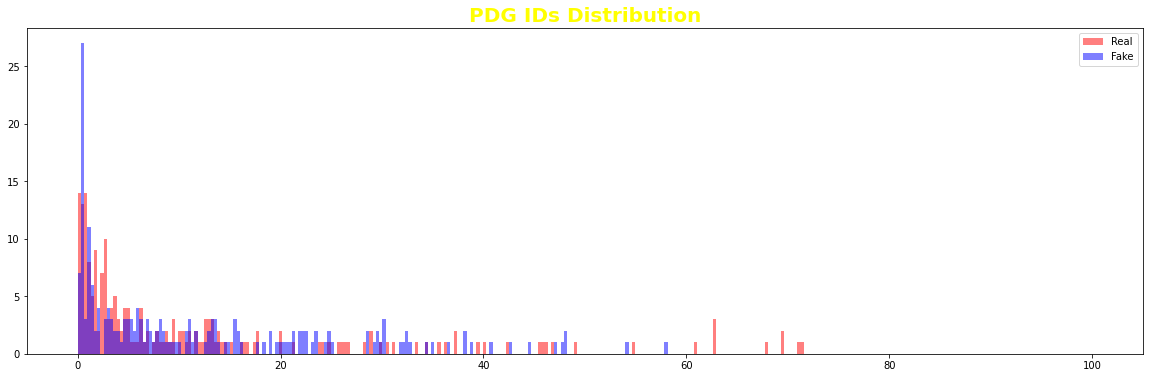

6699 0.44999998807907104 0.3700000047683716


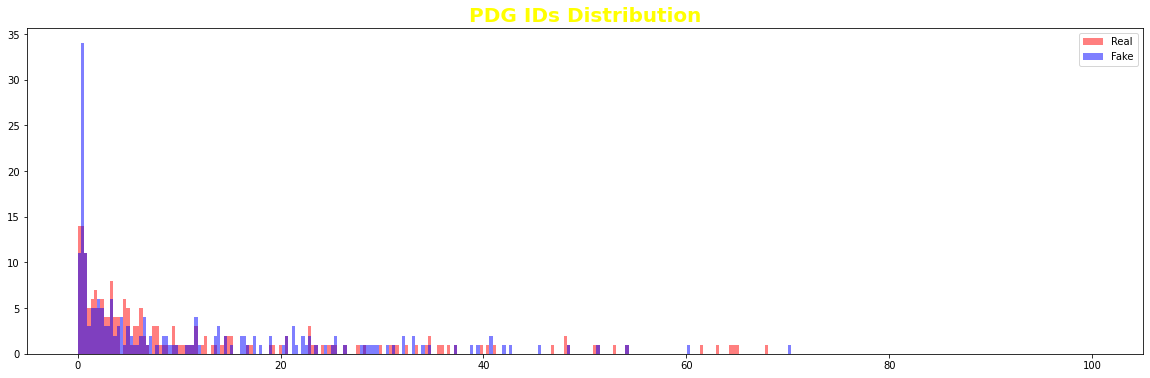

6799 0.2800000011920929 0.5099999904632568


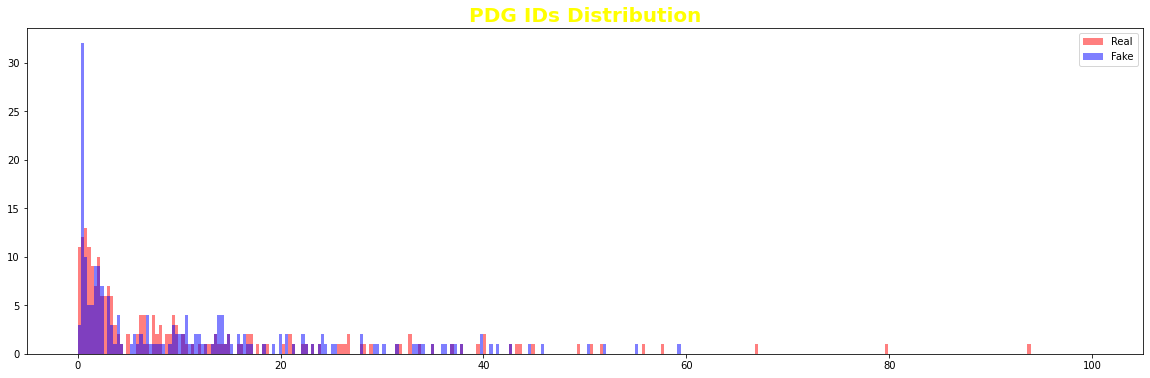

6899 0.33000001311302185 0.5099999904632568


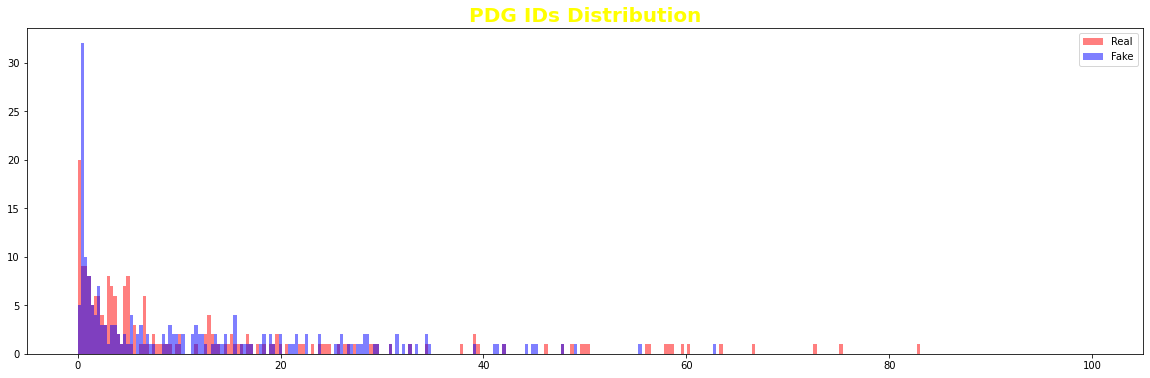

6999 0.5899999737739563 0.3100000023841858


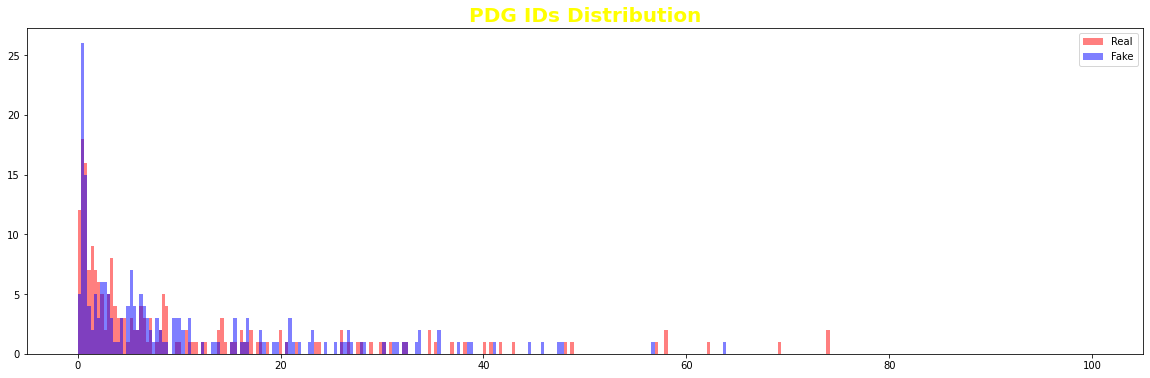

7099 0.4300000071525574 0.4099999964237213


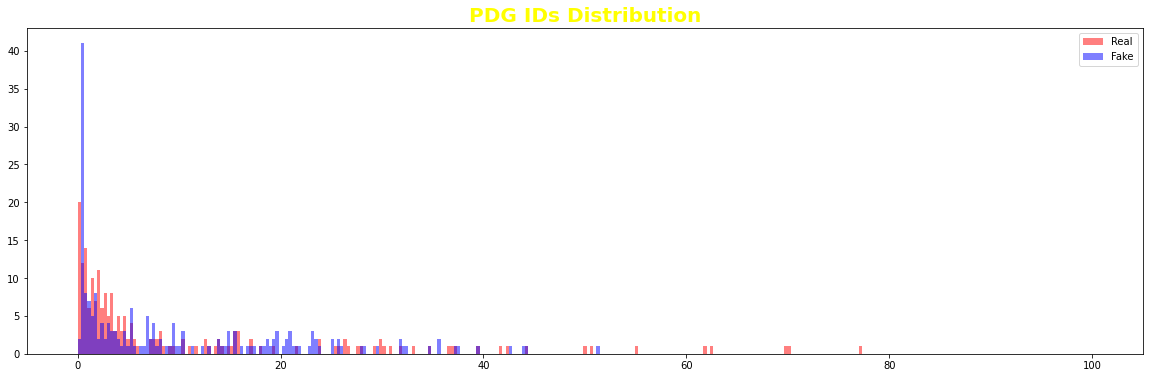

7199 0.3400000035762787 0.5400000214576721


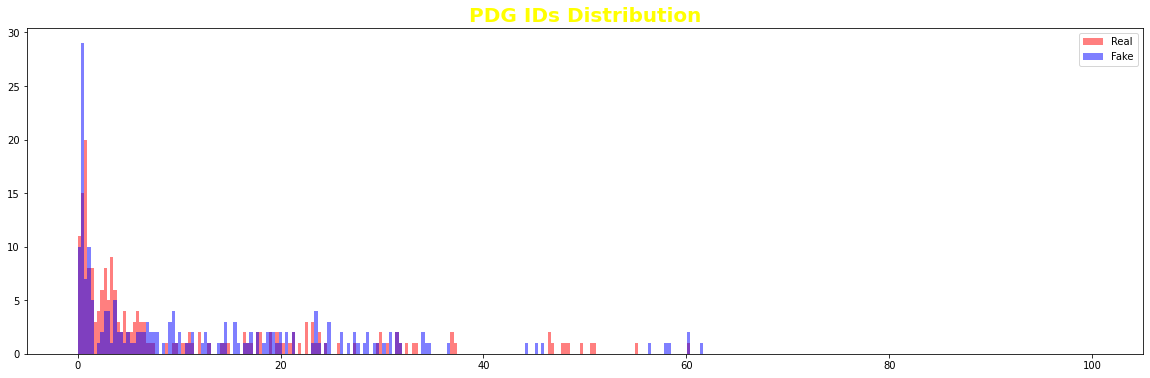

7299 0.6100000143051147 0.3100000023841858


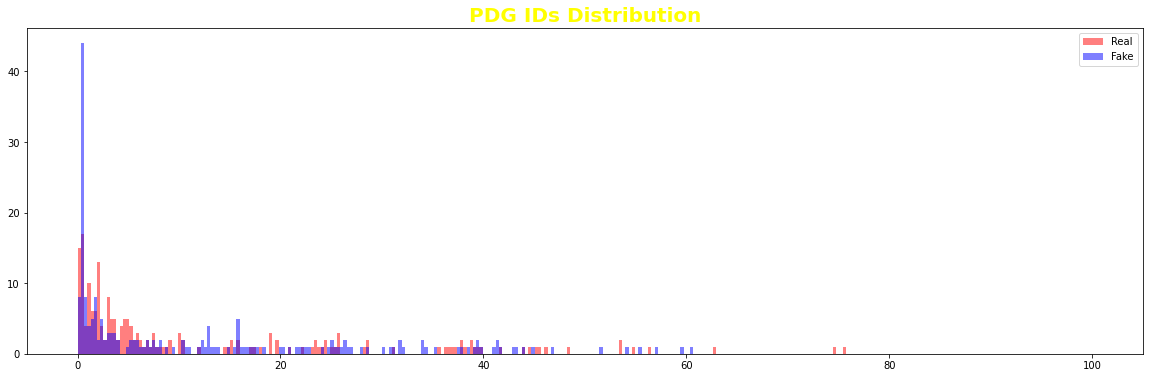

7399 0.47999998927116394 0.5299999713897705


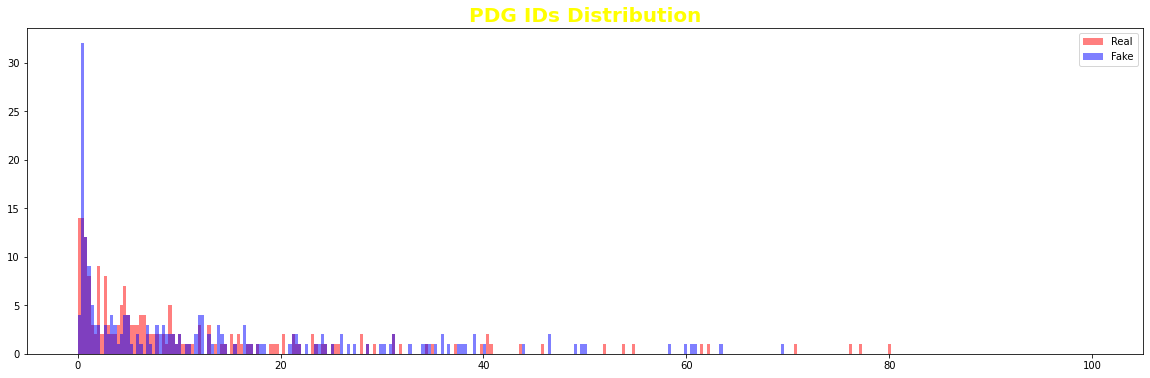

7499 0.28999999165534973 0.6899999976158142


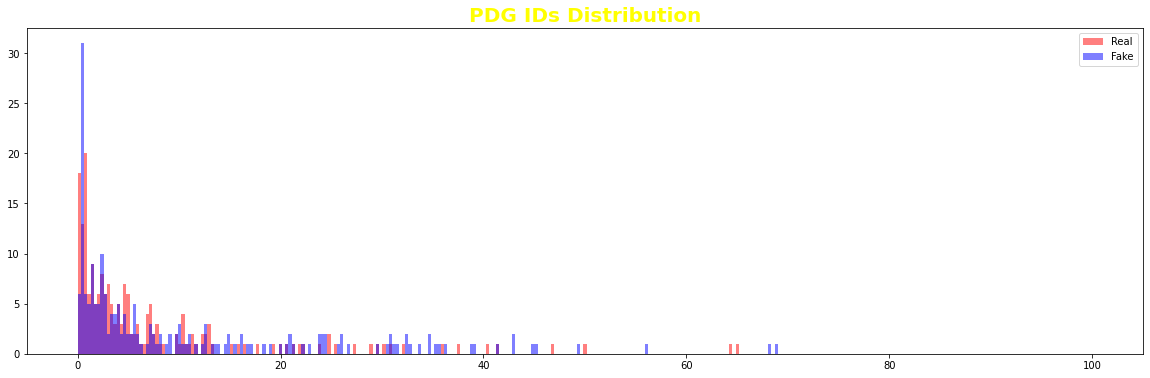

7599 0.3499999940395355 0.4300000071525574


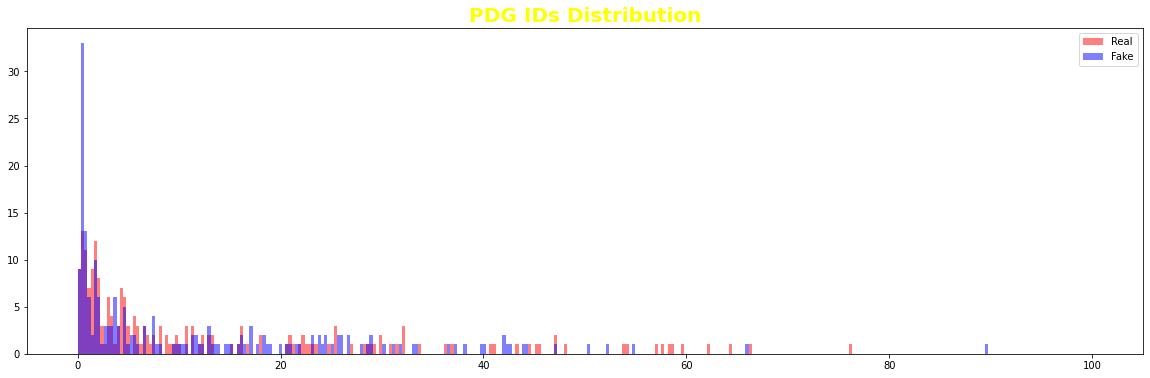

7699 0.5 0.38999998569488525


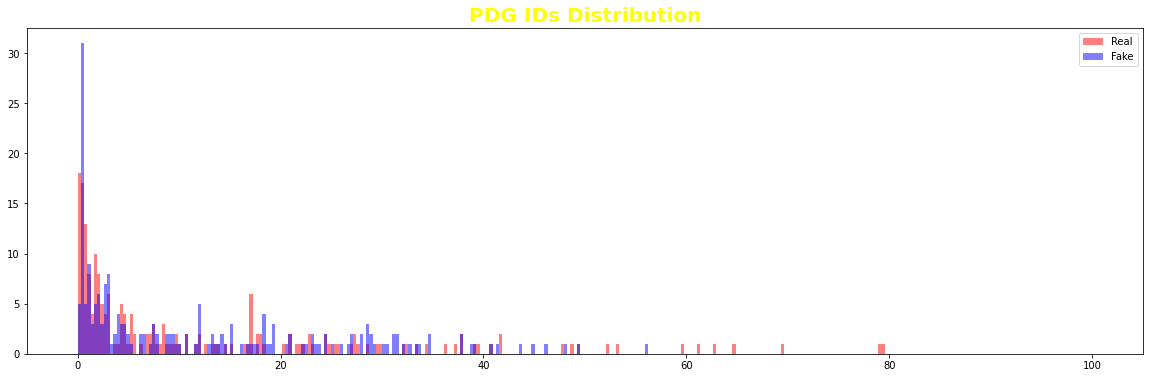

7799 0.44999998807907104 0.4099999964237213


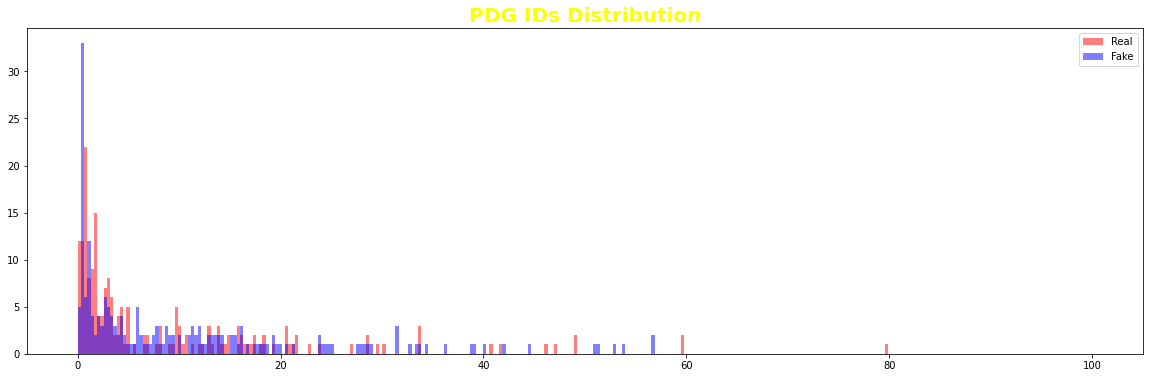

7899 0.23999999463558197 0.6100000143051147


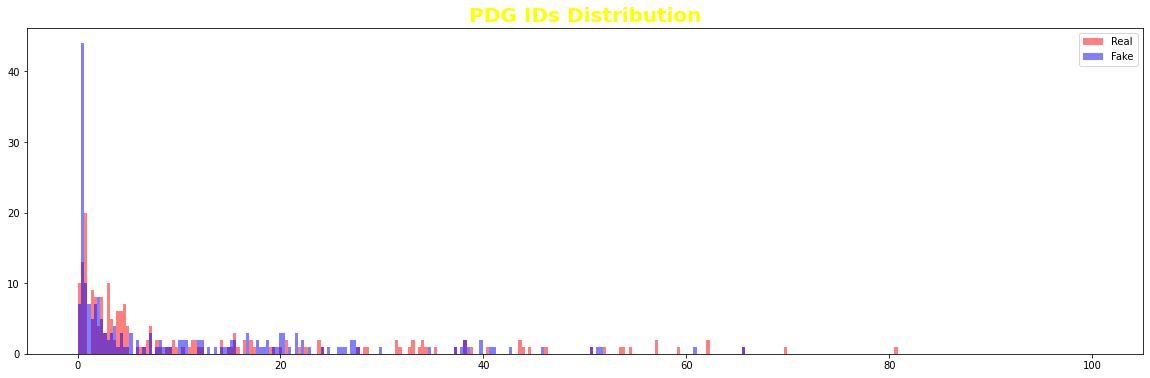

7999 0.5199999809265137 0.3799999952316284


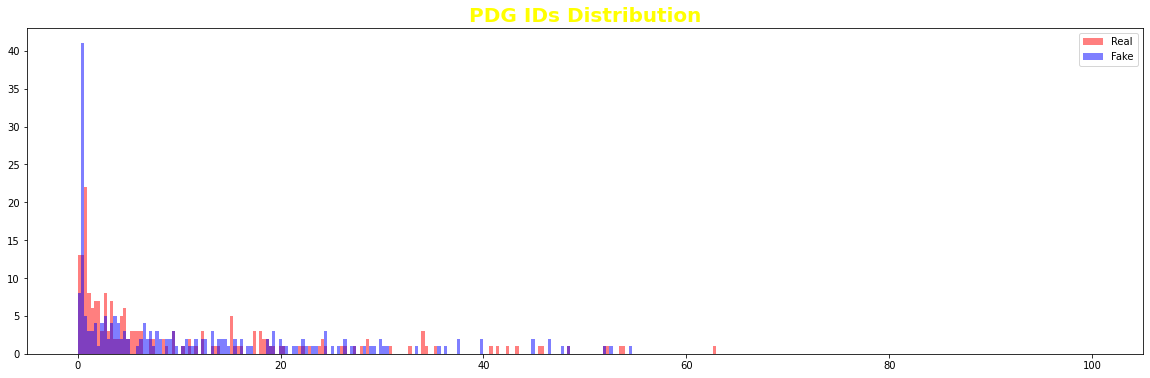

8099 0.4300000071525574 0.4399999976158142


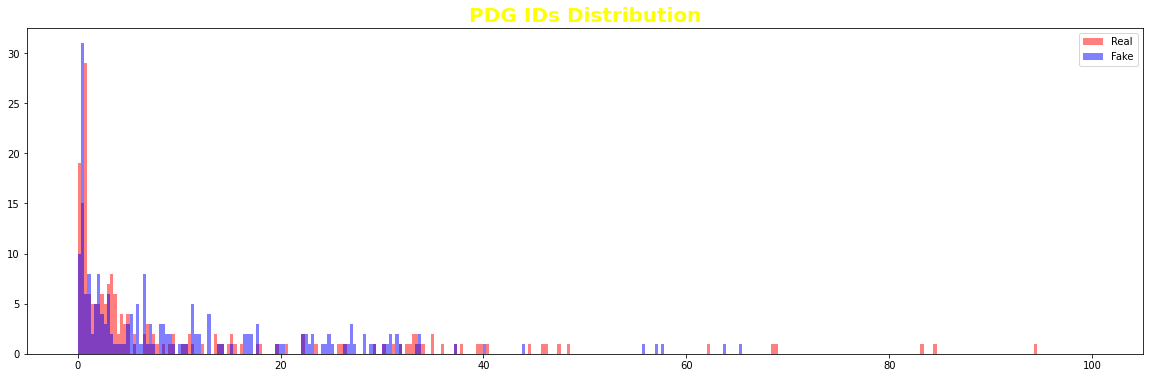

8199 0.44999998807907104 0.3799999952316284


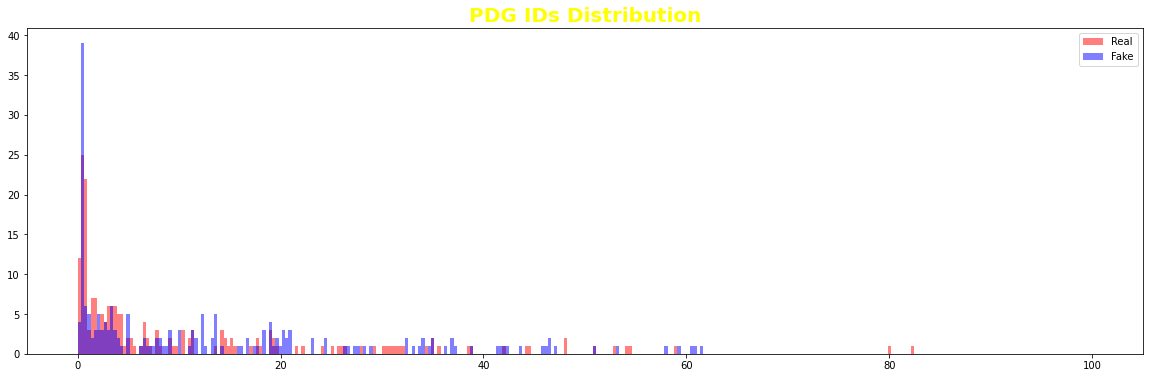

8299 0.49000000953674316 0.5400000214576721


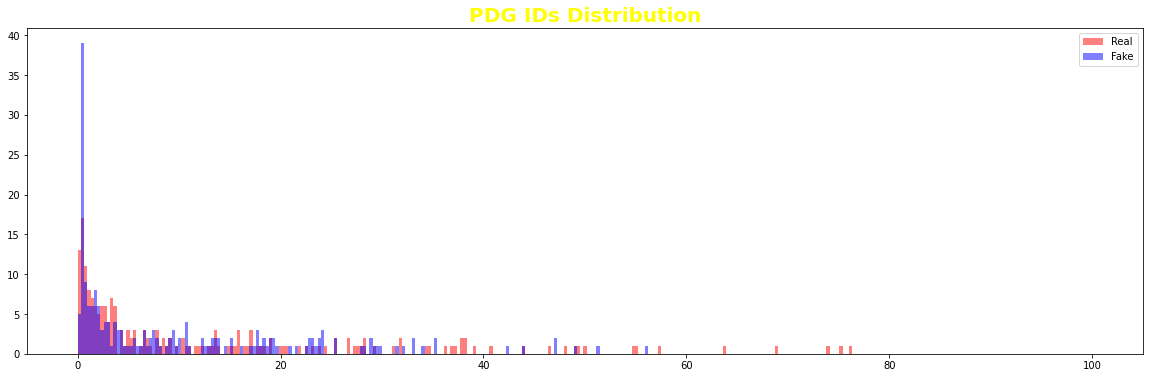

8399 0.25 0.8100000023841858


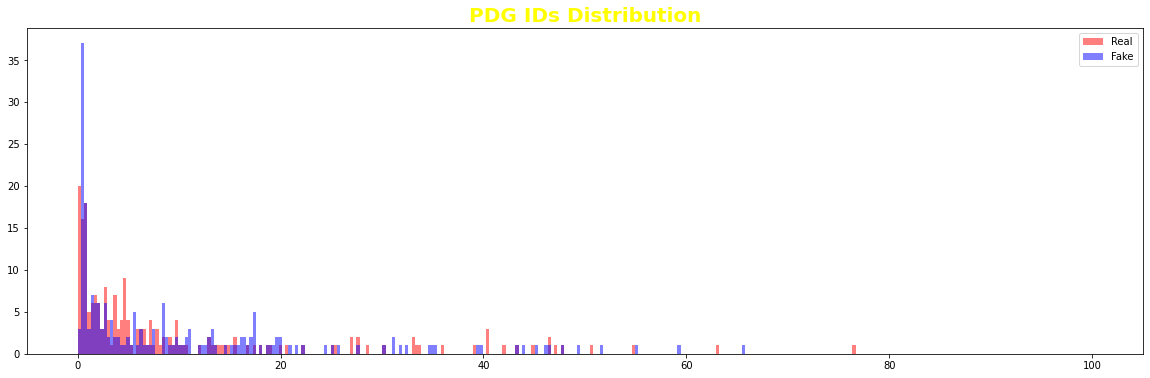

8499 0.36000001430511475 0.5699999928474426


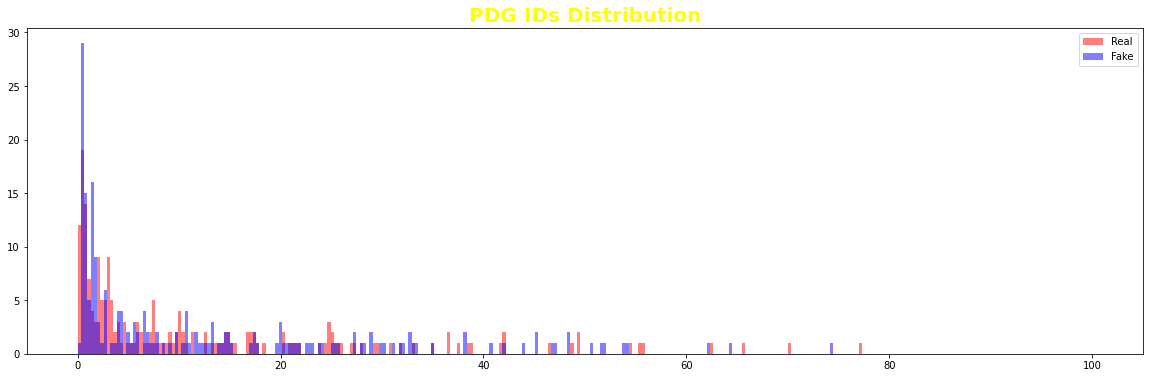

8599 0.6100000143051147 0.3100000023841858


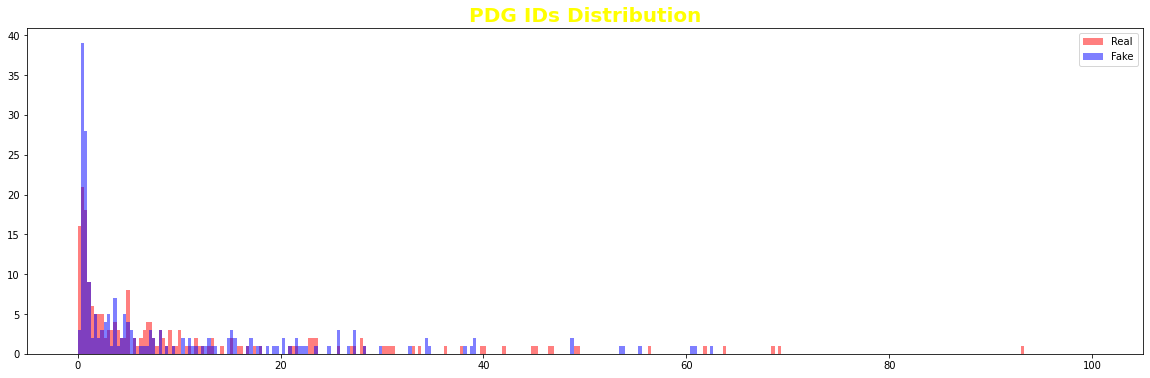

8699 0.44999998807907104 0.3700000047683716


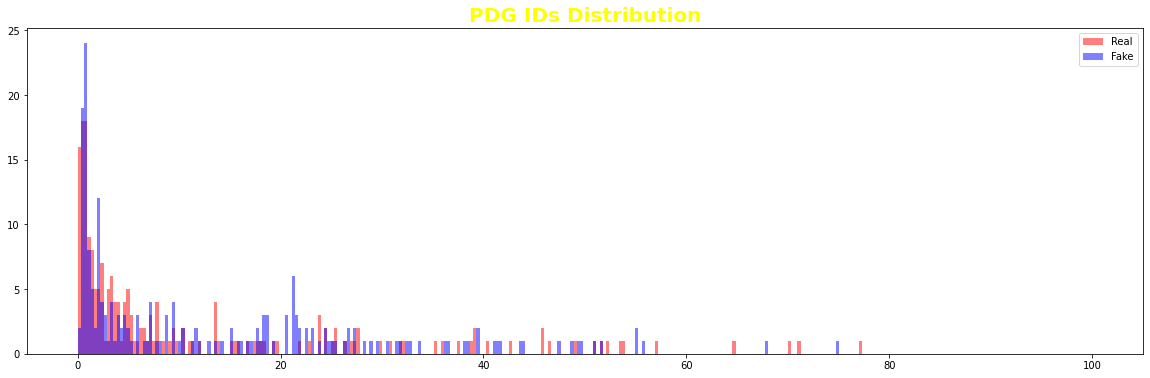

8799 0.5400000214576721 0.1599999964237213


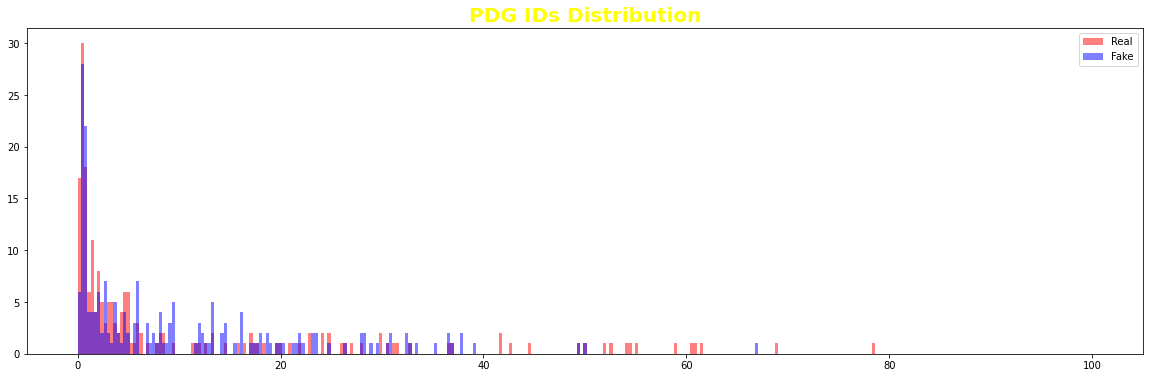

8899 0.6399999856948853 0.1899999976158142


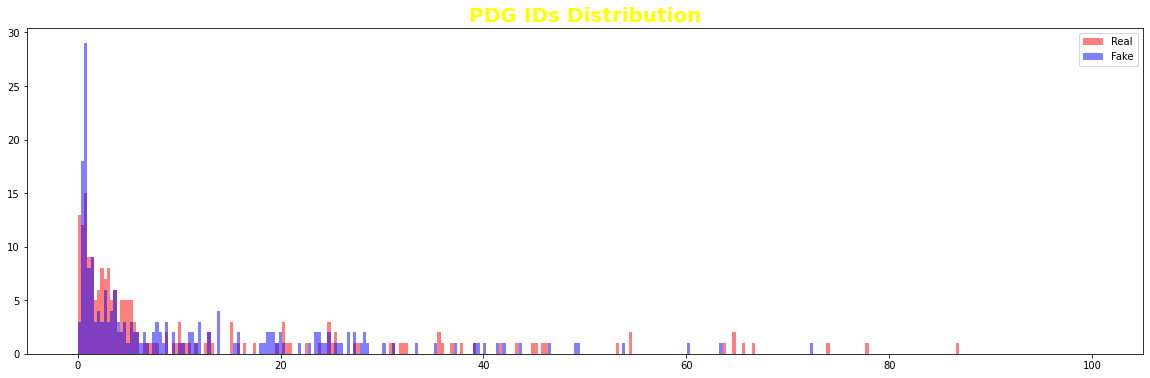

8999 0.4699999988079071 0.27000001072883606


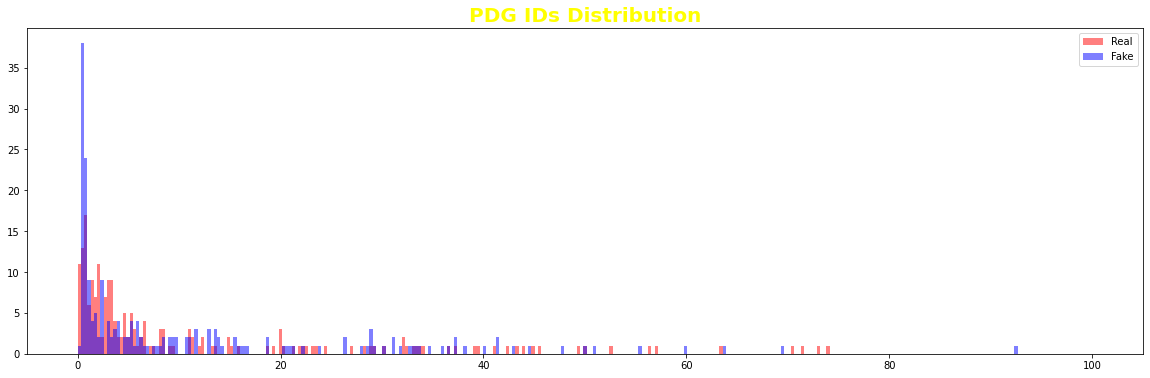

9099 0.3400000035762787 0.6499999761581421


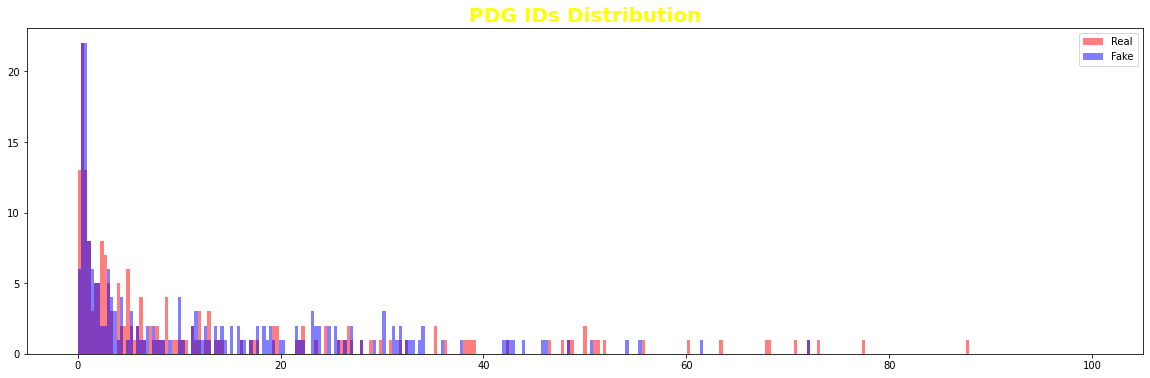

9199 0.3799999952316284 0.4399999976158142


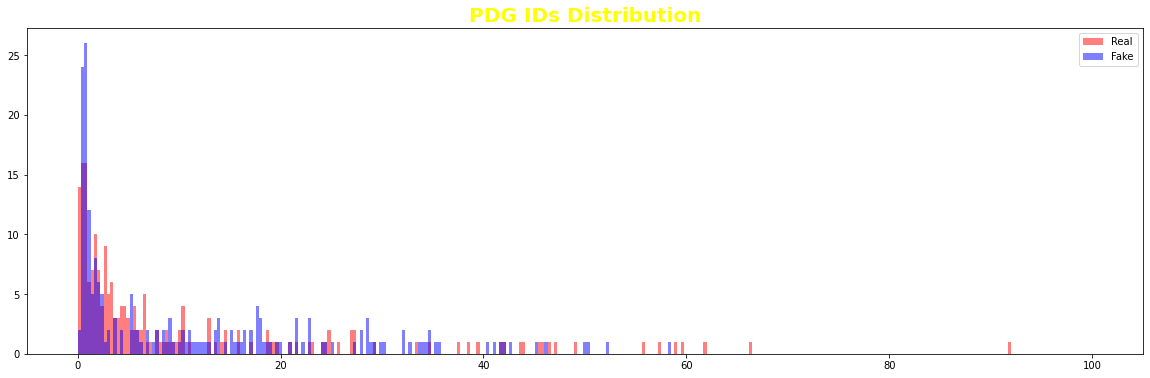

9299 0.15000000596046448 0.75


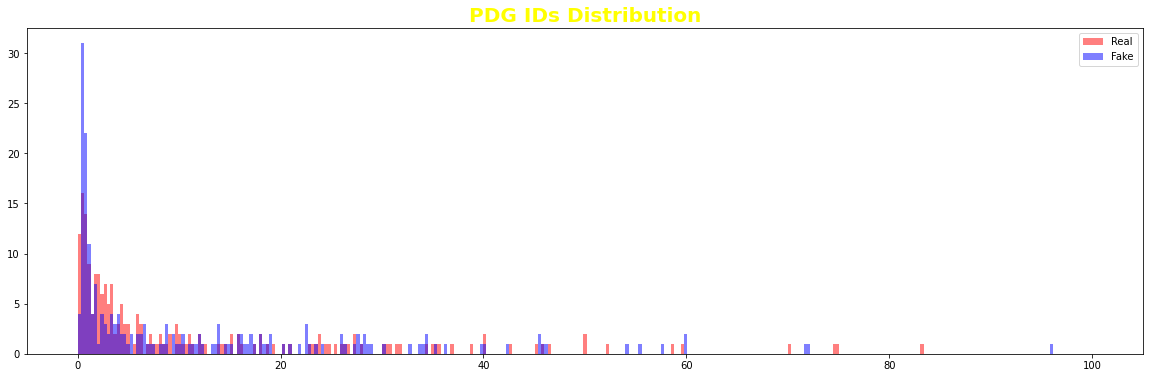

9399 0.20999999344348907 0.6899999976158142


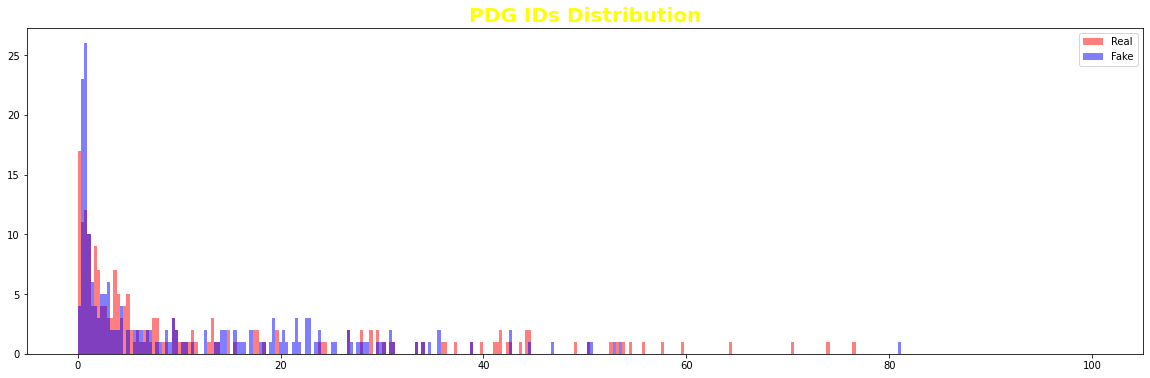

9499 0.23000000417232513 0.6200000047683716


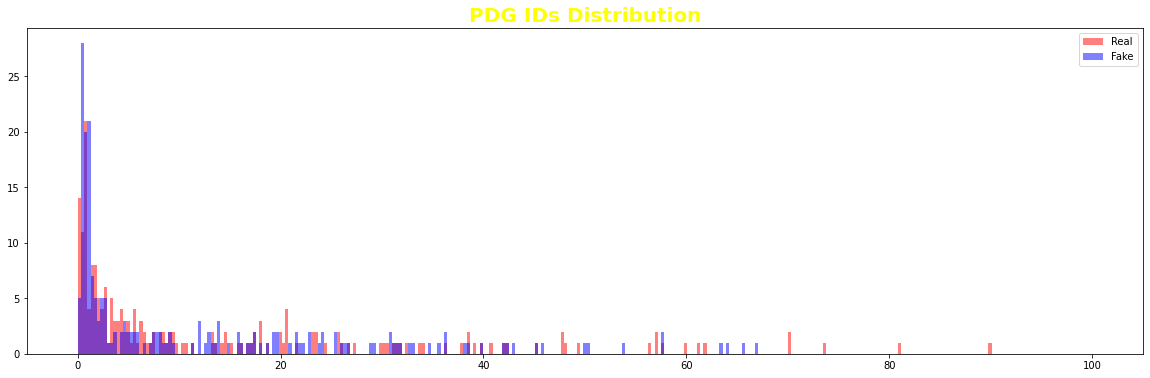

9599 0.3700000047683716 0.6600000262260437


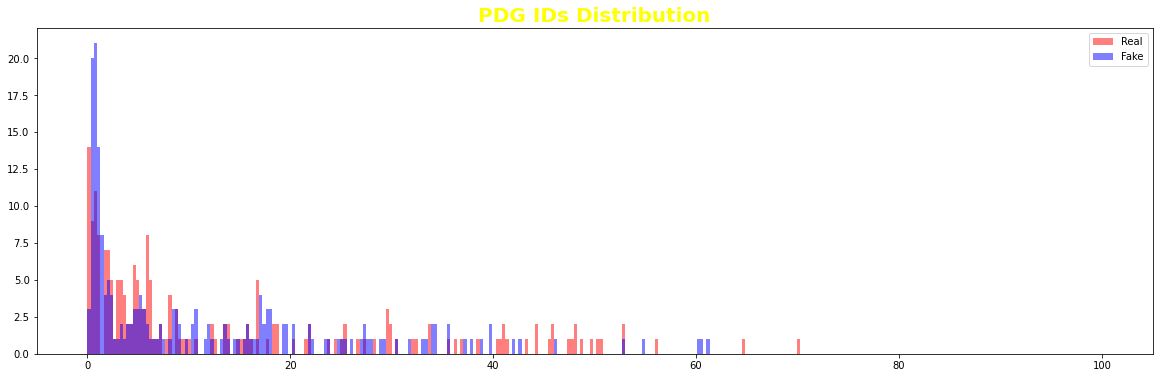

9699 0.36000001430511475 0.4399999976158142


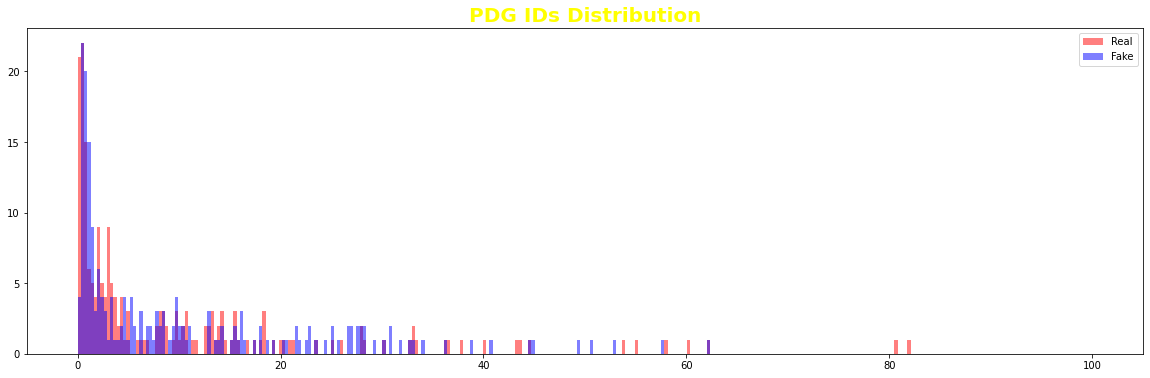

9799 0.3400000035762787 0.49000000953674316


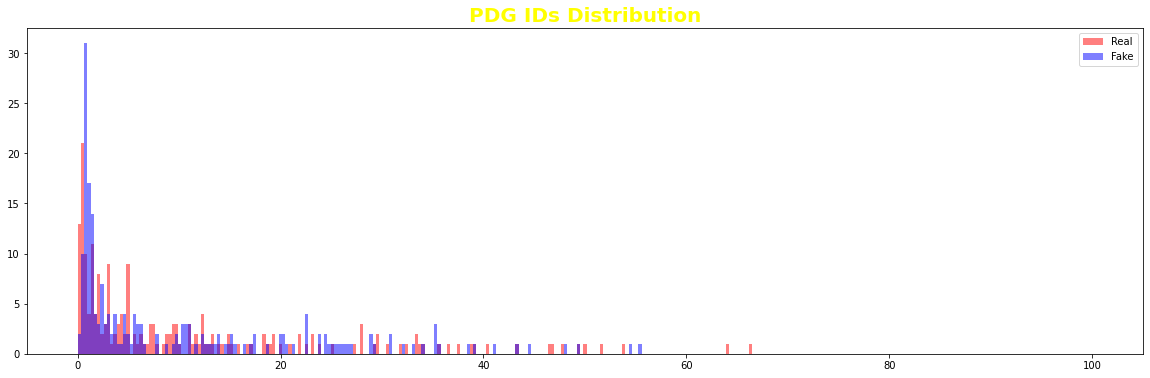

9899 0.3100000023841858 0.6700000166893005


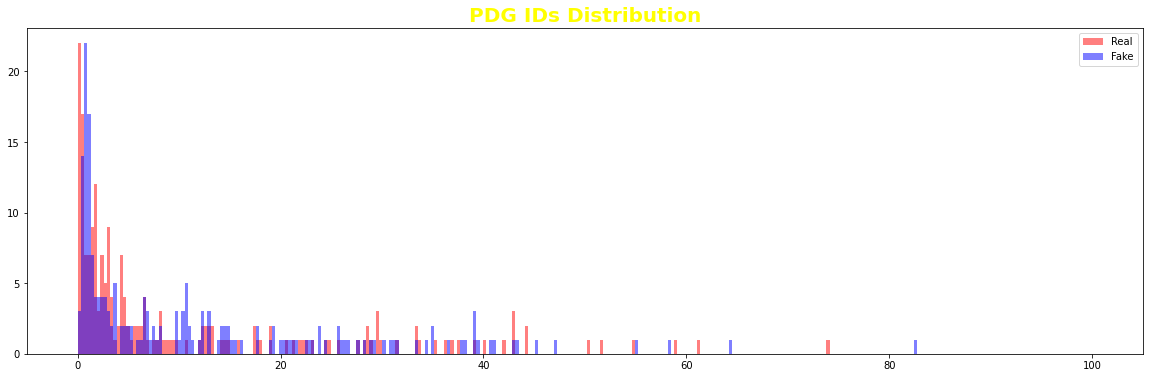

9999 0.2800000011920929 0.4699999988079071


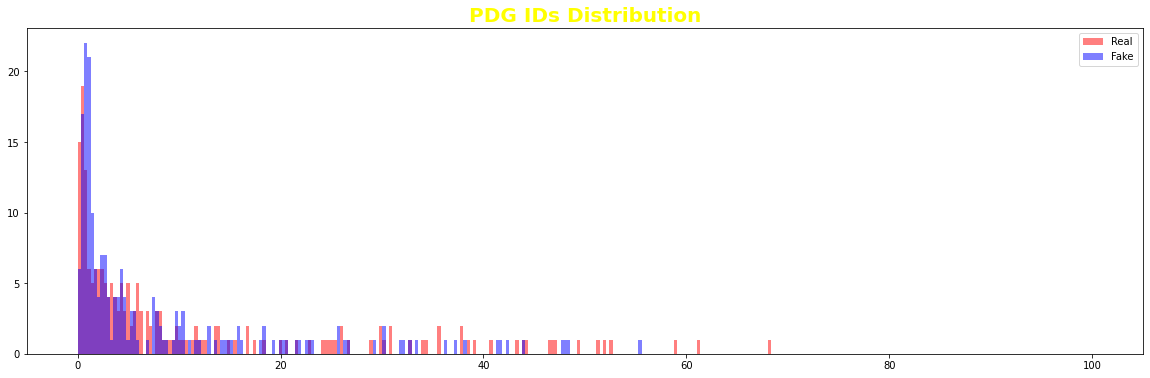

In [41]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

1 0.34095999598503113 0.550599992275238


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

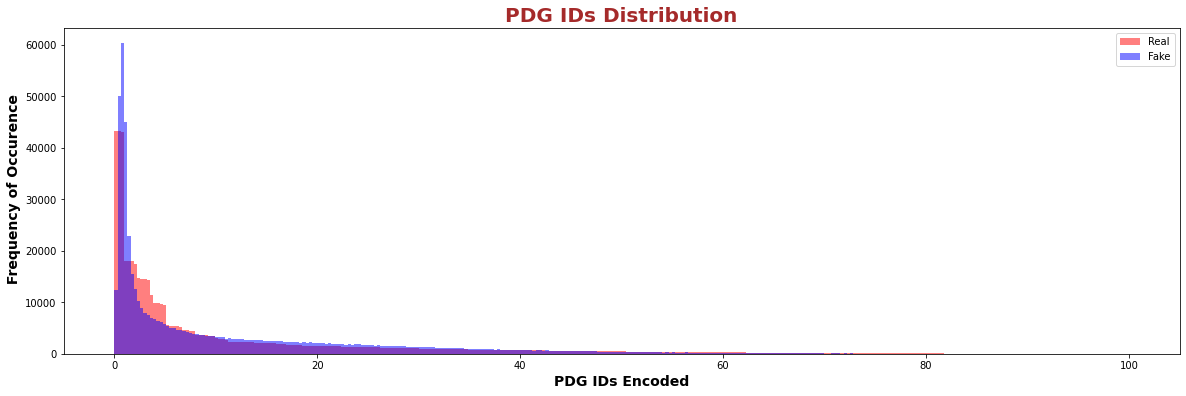

In [49]:
summarize_performance(1,generator, discriminator, latent_dim, n=275000)